<a href="https://colab.research.google.com/github/EnriqueQM/Sup-MachineLearning/blob/main/0924_SupML_Grupo9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Microsoft Malware Prediction

## Librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

##Cargar archivo

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/sample_mmp.csv'
df = pd.read_csv(file_path)

<ipython-input-5-80c0e6275dc4>:2: DtypeWarning: Columns (29,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


## Data Undestanding

In [ ]:
df.head()

Unnamed: 0                 MachineIdentifier   ProductName EngineVersion  \
0     8427007  f1cd864e97bae82bdf96523e1a539121  win8defender   1.1.15100.1   
1     8829090  fd5ba6f5b75325ec0423a6c67cc75942  win8defender   1.1.15100.1   
2     2731904  4e628391e7cc7c482fb3286f486dbd25  win8defender   1.1.15100.1   
3     1359513  270a2e9d028144a4df12a9e3da79fba5  win8defender   1.1.15200.1   
4      236059  06ca8fa8d32c2abdc5b3577d676b3269  win8defender   1.1.15200.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1234.0       0               7.0                 0   
1  4.18.1807.18075  1.273.1282.0       0               7.0                 0   
2   4.9.10586.1106   1.273.781.0       0               7.0                 0   
3  4.18.1807.18075  1.275.1639.0       0               7.0                 0   
4  4.18.1807.18075   1.275.511.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  AVProductsInstalled  \
0                        NaN                    53447.0                  1.0   
1                        NaN                    53447.0                  1.0   
2                        NaN                    46781.0                  2.0   
3                        NaN                    53447.0                  1.0   
4                        NaN                    47238.0                  2.0   

   AVProductsEnabled  HasTpm  CountryIdentifier  CityIdentifier  \
0                1.0       1                  8         85219.0   
1                1.0       1                129         54198.0   
2                1.0       1                149        122689.0   
3                1.0       1                164        114587.0   
4                1.0       1                207         72421.0   

   OrganizationIdentifier  GeoNameIdentifier  LocaleEnglishNameIdentifier  \
0                     NaN              205.0                          172   
1                     NaN              126.0                          124   
2                    27.0              181.0                           56   
3                    27.0              205.0                          172   
4                    27.0              277.0                           75   

    Platform Processor     OsVer  OsBuild  OsSuite OsPlatformSubRelease  \
0  windows10       x64  10.0.0.0    17134      256                  rs4   
1  windows10       x64  10.0.0.0    17134      256                  rs4   
2  windows10       x64  10.0.0.0    10586      768                  th2   
3  windows10       x64  10.0.0.0    17134      768                  rs4   
4  windows10       x64  10.0.0.0    17134      256                  rs4   

                                        OsBuildLab SkuEdition  IsProtected  \
0         17134.1.amd64fre.rs4_release.180410-1804        Pro          1.0   
1         17134.1.amd64fre.rs4_release.180410-1804        Pro          1.0   
2  10586.1176.amd64fre.th2_release_sec.170913-1848       Home          1.0   
3         17134.1.amd64fre.rs4_release.180410-1804       Home          1.0   
4         17134.1.amd64fre.rs4_release.180410-1804        Pro          1.0   

   AutoSampleOptIn PuaMode  SMode  IeVerIdentifier   SmartScreen  Firewall  \
0                0     NaN    0.0            137.0  RequireAdmin       1.0   
1                0     NaN    0.0            137.0  RequireAdmin       1.0   
2                0     NaN    0.0             74.0  RequireAdmin       1.0   
3                0     NaN    0.0            137.0           NaN       1.0   
4                0     NaN    0.0            137.0  RequireAdmin       1.0   

   UacLuaenable Census_MDC2FormFactor Census_DeviceFamily  \
0           1.0               Desktop     Windows.Desktop   
1           1.0              Notebook     Windows.Desktop   
2           1.0           Convertible     Windows.Desktop   
3           1.0              Notebook     Windows.Desktop   
4     

In [ ]:
df.shape

(500000, 84)

In [ ]:
df.describe(exclude=['object']).T

count          mean  \
Unnamed: 0                                         500000.0  4.458888e+06   
IsBeta                                             500000.0  2.000000e-06   
RtpStateBitfield                                   498168.0  6.846207e+00   
IsSxsPassiveMode                                   500000.0  1.724200e-02   
DefaultBrowsersIdentifier                           24061.0  1.652825e+03   
AVProductStatesIdentifier                          498062.0  4.785091e+04   
AVProductsInstalled                                498062.0  1.326763e+00   
AVProductsEnabled                                  498062.0  1.020714e+00   
HasTpm                                             500000.0  9.878160e-01   
CountryIdentifier                                  500000.0  1.080375e+02   
CityIdentifier                                     481760.0  8.127165e+04   
OrganizationIdentifier                             345437.0  2.486994e+01   
GeoNameIdentifier                                  499984.0  1.697304e+02   
LocaleEnglishNameIdentifier                        500000.0  1.226110e+02   
OsBuild                                            500000.0  1.572693e+04   
OsSuite                                            500000.0  5.747186e+02   
IsProtected                                        498074.0  9.457892e-01   
AutoSampleOptIn                                    500000.0  2.800000e-05   
SMode                                              470152.0  4.381562e-04   
IeVerIdentifier                                    496791.0  1.266626e+02   
Firewall                                           494838.0  9.782414e-01   
UacLuaenable                                       499377.0  1.372503e+01   
Census_OEMNameIdentifier                           494619.0  2.218646e+03   
Census_OEMModelIdentifier                          494236.0  2.391280e+05   
Census_ProcessorCoreCount                          497653.0  3.994074e+00   
Census_ProcessorManufacturerIdentifier             497653.0  4.529069e+00   
Census_ProcessorModelIdentifier                    497651.0  2.370987e+03   
Census_PrimaryDiskTotalCapacity                    497024.0  5.140433e+05   
Census_SystemVolumeTotalCapacity                   497024.0  3.780546e+05   
Census_HasOpticalDiskDrive                         500000.0  7.703400e-02   
Census_TotalPhysicalRAM                            495444.0  6.129232e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches  497346.0  1.668984e+01   
Census_InternalPrimaryDisplayResolutionHorizontal  497350.0  1.548304e+03   
Census_InternalPrimaryDisplayResolutionVertical    497350.0  8.982393e+02   
Census_InternalBatteryNumberOfCharges              484962.0  1.125600e+09   
Census_OSBuildNumber                               500000.0  1.584137e+04   
Census_OSBuildRevision                             500000.0  9.672248e+02   
Census_OSInstallLanguageIdentifier                 496668.0  1.460551e+01   
Census_OSUILocaleIdentifier                        500000.0  6.044631e+01   
Census_IsPortableOperatingSystem                   500000.0  5.220000e-04   
Census_IsFlightingInternal                          84775.0  2.359186e-05   
Census_IsFlightsDisabled                           491067.0  1.425467e-05   
Census_ThresholdOptIn                              181896.0  2.583894e-04   
Census_FirmwareManufacturerIdentifier              489651.0  4.026759e+02   
Census_FirmwareVersionIdentifier                   490939.0  3.303099e+04   
Census_IsSecureBootEnabled                         500000.0  4.854380e-01   
Census_IsWIMBootEnabled                            182334.0  0.000000e+00   
Census_IsVirtualDevice                             499099.0  7.066734e-03   
Census_IsTouchEnabled                              500000.0  1.254340e-01   
Census_IsPenCapable                                500000.0  3.774400e-02   
Census_IsAlwaysOnAlwaysConnectedCapable            495960.0  5.724454e-02   
Wdft_IsGamer                                      

In [ ]:
df.describe(include=['object']).T

count  unique  \
MachineIdentifier                 500000  500000   
ProductName                       500000       3   
EngineVersion                     500000      53   
AppVersion                        500000      95   
AvSigVersion                      500000    6455   
Platform                          500000       4   
Processor                         500000       3   
OsVer                             500000      21   
OsPlatformSubRelease              500000       9   
OsBuildLab                        499999     453   
SkuEdition                        500000       8   
PuaMode                              126       1   
SmartScreen                       321404      12   
Census_MDC2FormFactor             500000      12   
Census_DeviceFamily               500000       3   
Census_ProcessorClass               2082       3   
Census_PrimaryDiskTypeName        499291       4   
Census_ChassisTypeName            499963      34   
Census_PowerPlatformRoleName      499998       9   
Census_InternalBatteryType        144397      28   
Census_OSVersion                  500000     305   
Census_OSArchitecture             500000       3   
Census_OSBranch                   500000      15   
Census_OSEdition                  500000      22   
Census_OSSkuName                  500000      21   
Census_OSInstallTypeName          500000       9   
Census_OSWUAutoUpdateOptionsName  500000       6   
Census_GenuineStateName           500000       4   
Census_ActivationChannel          500000       6   
Census_FlightRing                 500000       8   

                                                                       top  \
MachineIdentifier                         f1cd864e97bae82bdf96523e1a539121   
ProductName                                                   win8defender   
EngineVersion                                                  1.1.15200.1   
AppVersion                                                 4.18.1807.18075   
AvSigVersion                                                  1.273.1420.0   
Platform                                                         windows10   
Processor                                                              x64   
OsVer                                                             10.0.0.0   
OsPlatformSubRelease                                                   rs4   
OsBuildLab                        17134.1.amd64fre.rs4_release.180410-1804   
SkuEdition                                                            Home   
PuaMode                                                                 on   
SmartScreen                                                   RequireAdmin   
Census_MDC2FormFactor                                             Notebook   
Census_DeviceFamily                                        Windows.Desktop   
Census_ProcessorClass                                                  mid   
Census_PrimaryDiskTypeName                                             HDD   
Census_ChassisTypeName                                            Notebook   
Census_PowerPlatformRoleName                                        Mobile   
Census_InternalBatteryType                                            lion   
Census_OSVersion                                            10.0.17134.228   
Census_OSArchitecture                                                amd64   
Census_OSBranch                                                rs4_release   
Census_OSEdition                                                      Core   
Census_OSSkuName                                                      CORE   
Census_OSInstallTypeName                                        UUPUpgrade   
Census_OSWUAutoUpdateOptionsName                                  FullAuto   
Census_GenuineStateName                                         IS_GENUINE   
Census_ActivationChannel                                            Retail   
Census_FlightRing                                                   Retail   

   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 84 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Unnamed: 0                                         500000 non-null  int64  
 1   MachineIdentifier                                  500000 non-null  object 
 2   ProductName                                        500000 non-null  object 
 3   EngineVersion                                      500000 non-null  object 
 4   AppVersion                                         500000 non-null  object 
 5   AvSigVersion                                       500000 non-null  object 
 6   IsBeta                                             500000 non-null  int64  
 7   RtpStateBitfield                                   498168 non-null  float64
 8   IsSxsPassiveMode                                   500000 non-null  int64 

In [ ]:
TARGET = 'HasDetections'

In [ ]:
df[TARGET].value_counts()

HasDetections
0    250047
1    249953
Name: count, dtype: int64

## Data Cleaning

In [ ]:
df.isnull().sum().sort_values(ascending=False)

PuaMode                                              499874
Census_ProcessorClass                                497918
DefaultBrowsersIdentifier                            475939
Census_IsFlightingInternal                           415225
Census_InternalBatteryType                           355603
Census_ThresholdOptIn                                318104
Census_IsWIMBootEnabled                              317666
SmartScreen                                          178596
OrganizationIdentifier                               154563
SMode                                                 29848
CityIdentifier                                        18240
Wdft_IsGamer                                          16950
Wdft_RegionIdentifier                                 16950
Census_InternalBatteryNumberOfCharges                 15038
Census_FirmwareManufacturerIdentifier                 10349
Census_FirmwareVersionIdentifier                       9061
Census_IsFlightsDisabled                               8933
Census_OEMModelIdentifier                              5764
Census_OEMNameIdentifier                               5381
Firewall                                               5162
Census_TotalPhysicalRAM                                4556
Census_IsAlwaysOnAlwaysConnectedCapable                4040
Census_OSInstallLanguageIdentifier                     3332
IeVerIdentifier                                        3209
Census_PrimaryDiskTotalCapacity                        2976
Census_SystemVolumeTotalCapacity                       2976
Census_InternalPrimaryDiagonalDisplaySizeInInches      2654
Census_InternalPrimaryDisplayResolutionHorizontal      2650
Census_InternalPrimaryDisplayResolutionVertical        2650
Census_ProcessorModelIdentifier                        2349
Census_ProcessorCoreCount                              2347
Census_ProcessorManufacturerIdentifier                 2347
AVProductsEnabled                                      1938
AVProductStatesIdentifier                              1938
AVProductsInstalled                                    1938
IsProtected                                            1926
RtpStateBitfield                                       1832
Census_IsVirtualDevice                                  901
Census_PrimaryDiskTypeName                              709
UacLuaenable                                            623
Census_ChassisTypeName                                   37
GeoNameIdentifier                                        16
Census_PowerPlatformRoleName                              2
OsBuildLab                                                1
Census_OSSkuName                                          0
Census_OSEdition                                          0
Census_OSWUAutoUpdateOptionsName                          0
Census_OSInstallTypeName                                  0
Census_OSUILocaleIdentifier                               0
Census_IsSecureBootEnabled                                0
Census_IsPenCapable                                       0
Census_IsTouchEnabled                                     0
Census_OSBuildNumber                                      0
Census_IsPortableOperatingSystem                          0
Census_GenuineStateName                                   0
Census_ActivationChannel                                  0
Census_FlightRing                                         0
Census_OSBuildRevision                                    0
Unnamed: 0                                                0
Census_OSBranch                                           0
Processor                                                 0
ProductName                                               0
EngineVersion                                             0
AppVersion                                                0
AvSigVersion                                              0
IsBeta                                                    0
IsSxsPassiveMode                        

### Null

In [ ]:
def plot_null_percentages(df):

    # Calcula el porcentaje de valores nulos en cada columna
    null_percentages = (df.isnull().sum() / len(df)) * 100
    null_percentages = null_percentages.sort_values(ascending=False)

    # Filtra solo las columnas con valores nulos
    null_percentages = null_percentages[null_percentages > 0]

    # Configuración del gráfico
    plt.figure(figsize=(10, len(null_percentages) * 0.6))  # Ajusta el tamaño dinámico

    # Generar colores en degradado
    colors = plt.cm.Blues(np.linspace(0.4, 1, len(null_percentages)))

    # Crear las barras con degradado
    bars = plt.barh(null_percentages.index, null_percentages, color=colors)

    # Título y etiquetas de los ejes
    plt.title('Porcentaje de valores nulos', fontsize=16, pad=20)
    plt.xlabel('Porcentaje de nulos (%)', fontsize=12)
    plt.gca().invert_yaxis()  # Invierte el eje Y para el orden descendente

    # Agregar etiquetas sobre las barras
    for bar in bars:
        plt.text(
            bar.get_width() + 0.5,  # Desplazamiento horizontal
            bar.get_y() + bar.get_height() / 2,  # Centrado vertical
            f'{bar.get_width():.2f}%',  # Etiqueta con formato
            va='center',  # Alineación vertical
            fontsize=10,  # Tamaño de la etiqueta
            color='black'
        )

    # Ajustar los márgenes para que no se corten las etiquetas
    plt.subplots_adjust(left=0.25, right=1.5, top=0.9, bottom=0.1)

    plt.show()

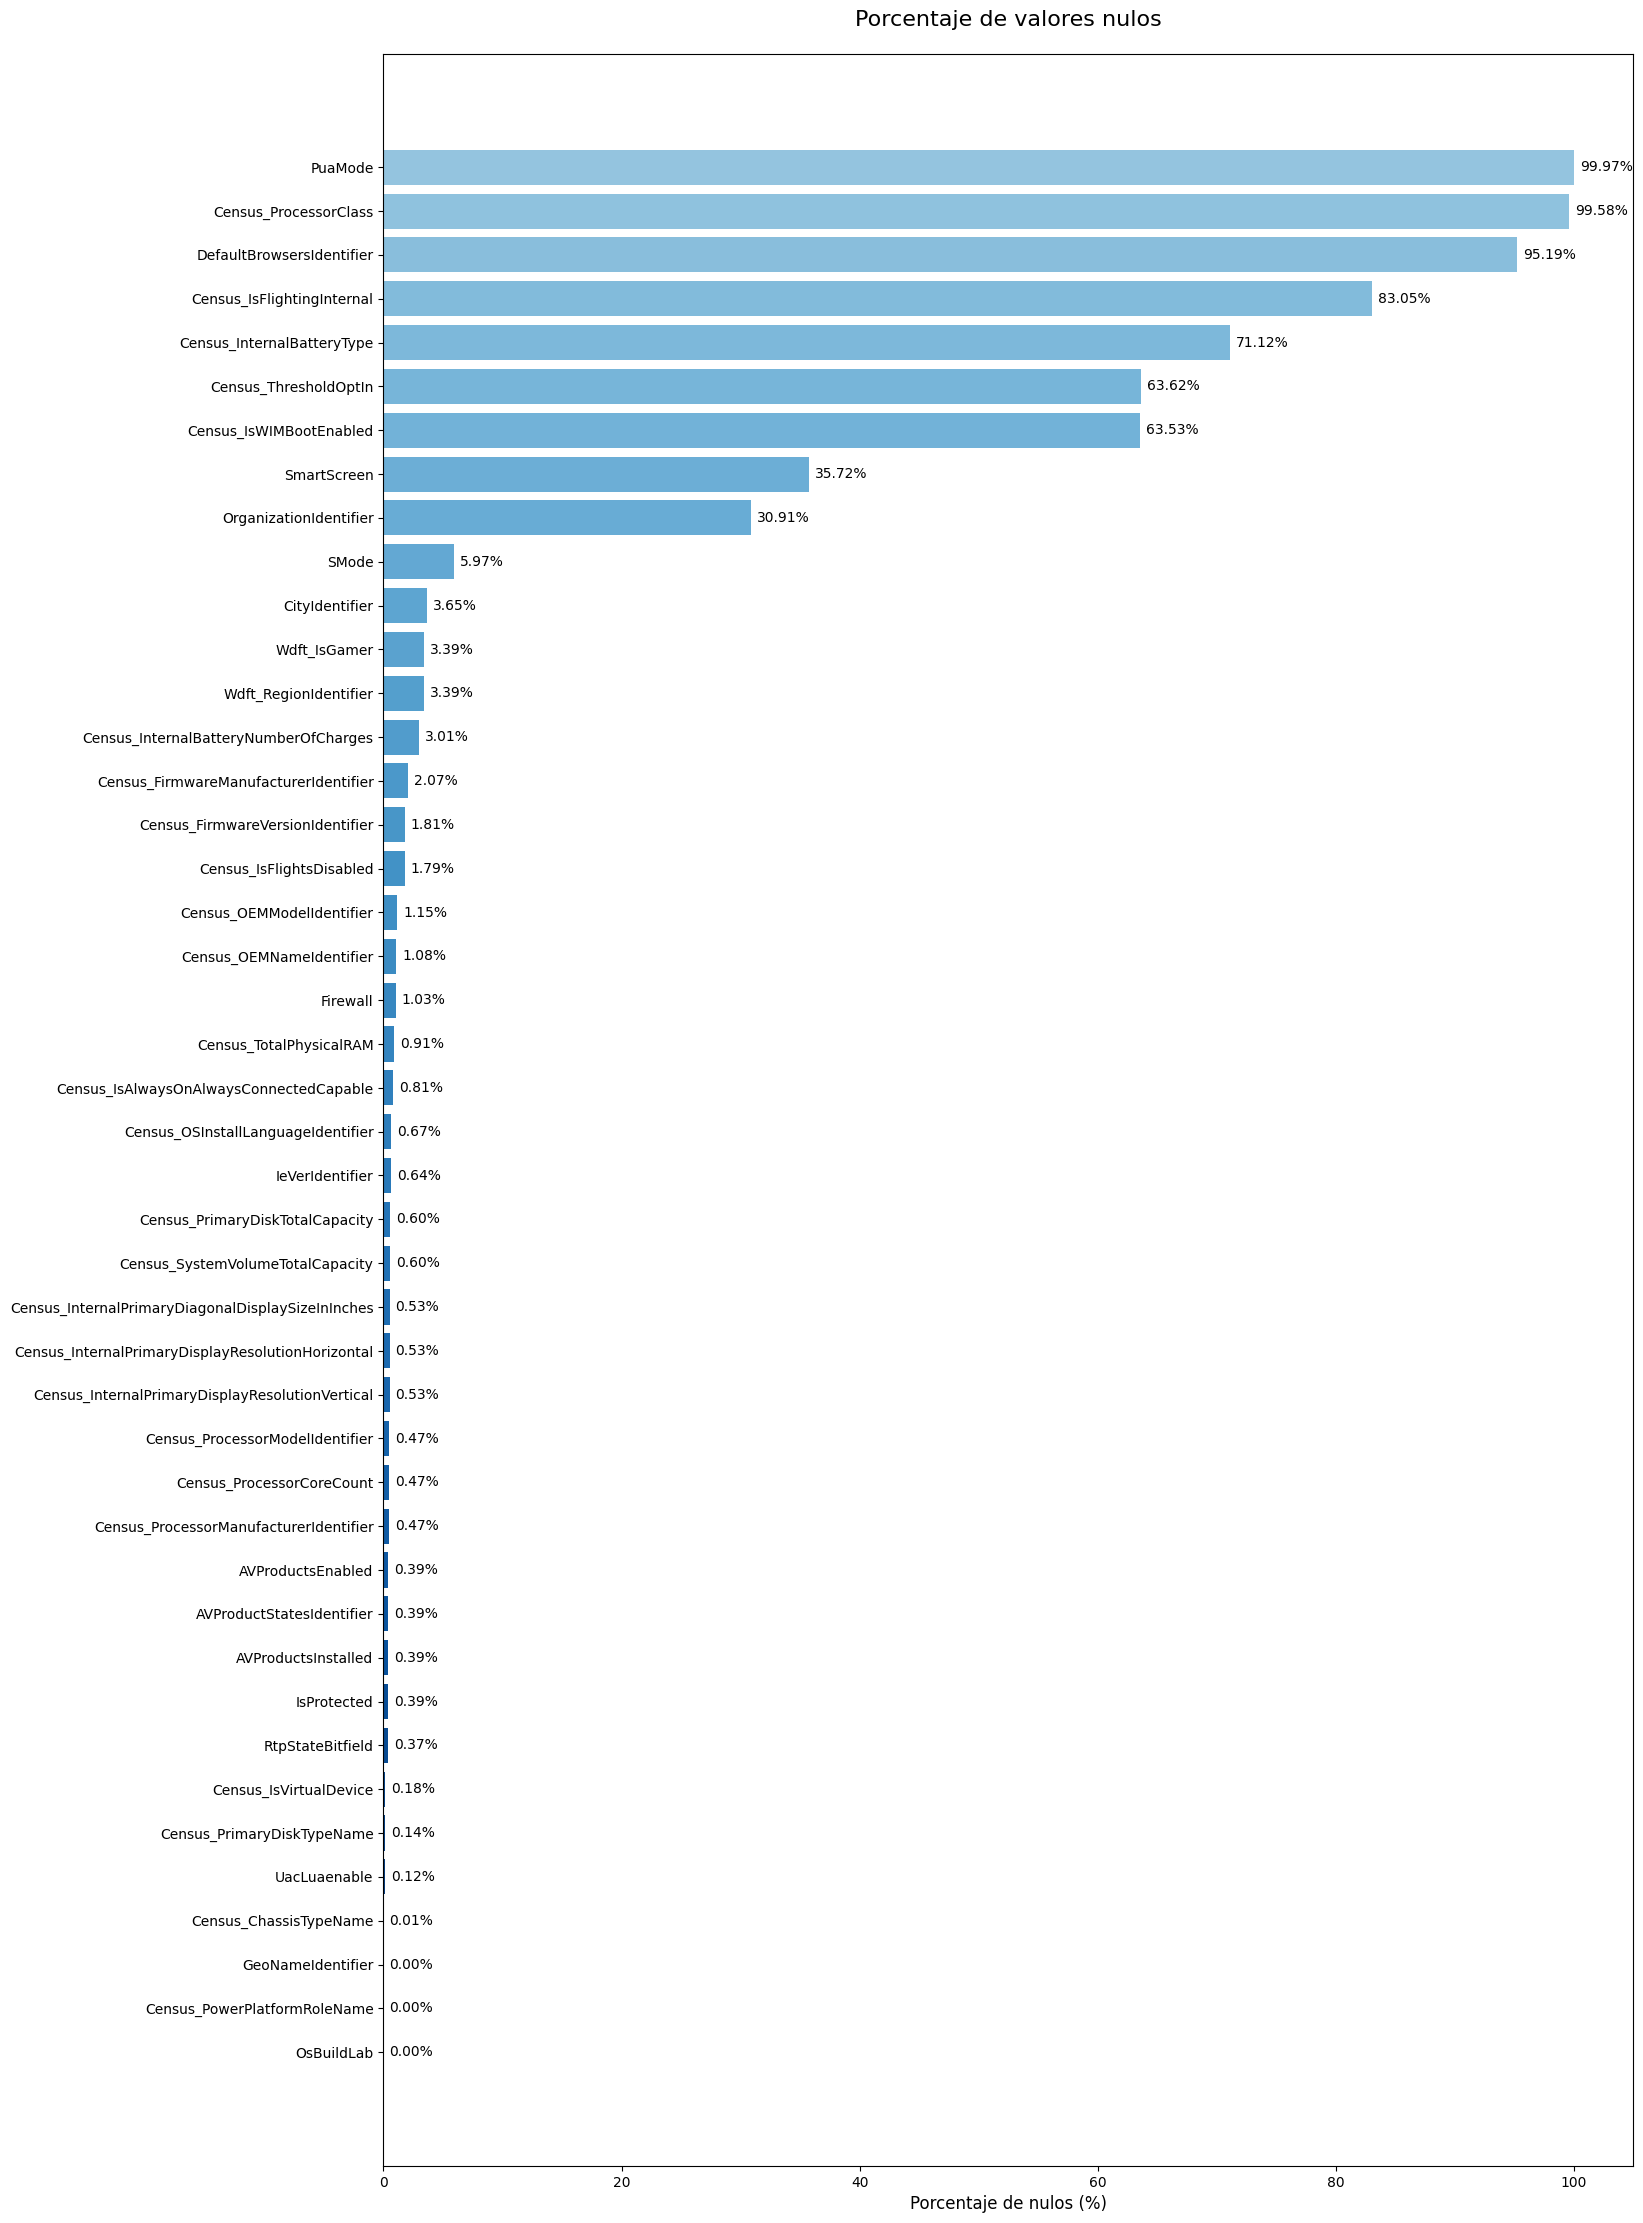

In [ ]:
plot_null_percentages(df)

Dado el tamaño del dataset y el objetivo del ejercicio, eliminaremos todas aquellas columnas con un porcentaje de nulos del 30% o mas para evitar el sesgo y garantizar el deseméño del modelo

In [ ]:
drop_col = ['PuaMode', 'Census_ProcessorClass', 'DefaultBrowsersIdentifier', 'Census_IsFlightingInternal', 'Census_InternalBatteryType', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled', 'SmartScreen', 'OrganizationIdentifier', 'Unnamed: 0']
df.drop(columns=drop_col, inplace=True)

In [ ]:
df.shape

(500000, 74)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

SMode                                                29848
CityIdentifier                                       18240
Wdft_RegionIdentifier                                16950
Wdft_IsGamer                                         16950
Census_InternalBatteryNumberOfCharges                15038
Census_FirmwareManufacturerIdentifier                10349
Census_FirmwareVersionIdentifier                      9061
Census_IsFlightsDisabled                              8933
Census_OEMModelIdentifier                             5764
Census_OEMNameIdentifier                              5381
Firewall                                              5162
Census_TotalPhysicalRAM                               4556
Census_IsAlwaysOnAlwaysConnectedCapable               4040
Census_OSInstallLanguageIdentifier                    3332
IeVerIdentifier                                       3209
Census_SystemVolumeTotalCapacity                      2976
Census_PrimaryDiskTotalCapacity                       2976
Census_InternalPrimaryDiagonalDisplaySizeInInches     2654
Census_InternalPrimaryDisplayResolutionVertical       2650
Census_InternalPrimaryDisplayResolutionHorizontal     2650
Census_ProcessorModelIdentifier                       2349
Census_ProcessorCoreCount                             2347
Census_ProcessorManufacturerIdentifier                2347
AVProductsEnabled                                     1938
AVProductsInstalled                                   1938
AVProductStatesIdentifier                             1938
IsProtected                                           1926
RtpStateBitfield                                      1832
Census_IsVirtualDevice                                 901
Census_PrimaryDiskTypeName                             709
UacLuaenable                                           623
Census_ChassisTypeName                                  37
GeoNameIdentifier                                       16
Census_PowerPlatformRoleName                             2
OsBuildLab                                               1
Census_OSEdition                                         0
Census_OSBuildRevision                                   0
Census_OSUILocaleIdentifier                              0
Census_OSSkuName                                         0
Census_OSInstallTypeName                                 0
Census_OSBranch                                          0
Census_OSWUAutoUpdateOptionsName                         0
Census_IsPortableOperatingSystem                         0
Census_GenuineStateName                                  0
Census_ActivationChannel                                 0
Census_FlightRing                                        0
Census_IsSecureBootEnabled                               0
Census_IsTouchEnabled                                    0
Census_IsPenCapable                                      0
Census_OSBuildNumber                                     0
MachineIdentifier                                        0
Census_OSArchitecture                                    0
Processor                                                0
EngineVersion                                            0
AppVersion                                               0
AvSigVersion                                             0
IsBeta                                                   0
IsSxsPassiveMode                                         0
HasTpm                                                   0
CountryIdentifier                                        0
LocaleEnglishNameIdentifier                              0
Platform                                                 0
OsVer                                                    0
Census_OSVersion                                         0
OsBuild                                                  0
OsSuite                                                  0
OsPlatformSubRelease                                     0
SkuEdition                                     

In [ ]:
df.nunique().sort_values(ascending=False)

MachineIdentifier                                    500000
Census_SystemVolumeTotalCapacity                     142051
Census_OEMModelIdentifier                             40697
CityIdentifier                                        37157
Census_FirmwareVersionIdentifier                      23569
AvSigVersion                                           6455
AVProductStatesIdentifier                              5516
Census_InternalBatteryNumberOfCharges                  5248
Census_ProcessorModelIdentifier                        2243
Census_OEMNameIdentifier                               1589
Census_PrimaryDiskTotalCapacity                        1103
Census_TotalPhysicalRAM                                 552
Census_InternalPrimaryDiagonalDisplaySizeInInches       520
Census_InternalPrimaryDisplayResolutionVertical         514
Census_InternalPrimaryDisplayResolutionHorizontal       474
OsBuildLab                                              453
Census_OSVersion                                        305
Census_FirmwareManufacturerIdentifier                   303
GeoNameIdentifier                                       268
Census_OSBuildRevision                                  242
LocaleEnglishNameIdentifier                             233
CountryIdentifier                                       222
IeVerIdentifier                                         179
AppVersion                                               95
Census_OSUILocaleIdentifier                              92
Census_OSBuildNumber                                     61
EngineVersion                                            53
OsBuild                                                  48
Census_OSInstallLanguageIdentifier                       39
Census_ChassisTypeName                                   34
Census_ProcessorCoreCount                                27
Census_OSEdition                                         22
Census_OSSkuName                                         21
OsVer                                                    21
Wdft_RegionIdentifier                                    15
Census_OSBranch                                          15
Census_MDC2FormFactor                                    12
Census_OSInstallTypeName                                  9
OsSuite                                                   9
OsPlatformSubRelease                                      9
Census_PowerPlatformRoleName                              9
Census_FlightRing                                         8
SkuEdition                                                8
RtpStateBitfield                                          7
Census_ActivationChannel                                  6
Census_OSWUAutoUpdateOptionsName                          6
AVProductsEnabled                                         5
AVProductsInstalled                                       5
UacLuaenable                                              5
Census_PrimaryDiskTypeName                                4
Census_ProcessorManufacturerIdentifier                    4
Platform                                                  4
Census_GenuineStateName                                   4
Census_OSArchitecture                                     3
Census_DeviceFamily                                       3
Processor                                                 3
ProductName                                               3
Census_IsVirtualDevice                                    2
Census_IsPenCapable                                       2
Census_IsTouchEnabled                                     2
Census_IsSecureBootEnabled                                2
Wdft_IsGamer                                              2
Census_IsAlwaysOnAlwaysConnectedCapable                   2
HasTpm                                                    2
Census_IsFlightsDisabled                                  2
Census_IsPortableOperatingSystem                          2
Census_HasOpticalDiskDrive              

### Unique Values & correlations

Acontinuación vemos los datos unicos de cada variable

In [ ]:
def display_unique_values(df):

    for col in df.columns:
        unique_values = df[col].unique()
        print(f"Columna '{col}' tiene {len(unique_values)} valores únicos:")
        print(unique_values)
        print("-" * 50)

In [ ]:
display_unique_values(df)

Columna 'MachineIdentifier' tiene 500000 valores únicos:
['f1cd864e97bae82bdf96523e1a539121' 'fd5ba6f5b75325ec0423a6c67cc75942'
 '4e628391e7cc7c482fb3286f486dbd25' ... 'fd16cd542d660848d272e4552bcccb1e'
 'fa0841f8f6147de7c3d287e05270ed42' '7b45dc3537e17f16305c5983ca0a1cb9']
--------------------------------------------------
Columna 'ProductName' tiene 3 valores únicos:
['win8defender' 'mse' 'mseprerelease']
--------------------------------------------------
Columna 'EngineVersion' tiene 53 valores únicos:
['1.1.15100.1' '1.1.15200.1' '1.1.14600.4' '1.1.15000.2' '1.1.15300.6'
 '1.1.13202.0' '1.1.14800.3' '1.1.15300.5' '1.1.14104.0' '1.1.14901.4'
 '1.1.14405.2' '1.1.14306.0' '1.1.14500.5' '1.1.13504.0' '1.1.14901.3'
 '1.1.14201.0' '1.1.14700.5' '1.1.14305.0' '1.1.14003.0' '1.1.13601.0'
 '1.1.13000.0' '1.1.13804.0' '1.1.14202.0' '1.1.12902.0' '1.1.13303.0'
 '1.1.15000.1' '1.1.13103.0' '1.1.13903.0' '1.1.13704.0' '1.1.13407.0'
 '1.1.13701.0' '1.1.12805.0' '1.1.14700.3' '1.1.14800.1' '1.1.1

Luego buscamos variables las cuales tienen valores con frecuencias altas

In [ ]:
def count_high_frequency_columns(df, threshold=0.05):
    """
    Muestra las columnas con valores que tienen frecuencias altas (mayores al umbral) y
    devuelve una lista de esas columnas.

    """
    high_frequency_columns = []

    for col in df.columns:
        # Calcular frecuencias de los valores únicos
        value_counts = df[col].value_counts(normalize=True, dropna=False)

        # Verificar si algún valor supera el umbral
        if any(value_counts > threshold):
            high_frequency_columns.append(col)

            # Imprimir la información de la columna
            print(f"Columna '{col}' tiene valores con frecuencia > {threshold * 100}%:")
            print(value_counts[value_counts > threshold].sort_values(ascending=False))
            print("-" * 50)

    return high_frequency_columns

In [ ]:
high_freq_cols = count_high_frequency_columns(df, threshold=0.9)

Columna 'ProductName' tiene valores con frecuencia > 90.0%:
ProductName
win8defender    0.989208
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'IsBeta' tiene valores con frecuencia > 90.0%:
IsBeta
0    0.999998
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'RtpStateBitfield' tiene valores con frecuencia > 90.0%:
RtpStateBitfield
7.0    0.969682
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'IsSxsPassiveMode' tiene valores con frecuencia > 90.0%:
IsSxsPassiveMode
0    0.982758
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'AVProductsEnabled' tiene valores con frecuencia > 90.0%:
AVProductsEnabled
1.0    0.970358
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'HasTpm' tiene valores con frecuencia > 90.0%:
HasTpm
1    0.987816
Name: proportion, dtype: float64
----

In [ ]:
high_freq_cols

['ProductName',
 'IsBeta',
 'RtpStateBitfield',
 'IsSxsPassiveMode',
 'AVProductsEnabled',
 'HasTpm',
 'Platform',
 'Processor',
 'OsVer',
 'IsProtected',
 'AutoSampleOptIn',
 'SMode',
 'Firewall',
 'UacLuaenable',
 'Census_DeviceFamily',
 'Census_HasOpticalDiskDrive',
 'Census_OSArchitecture',
 'Census_IsPortableOperatingSystem',
 'Census_IsFlightsDisabled',
 'Census_FlightRing',
 'Census_IsVirtualDevice',
 'Census_IsPenCapable',
 'Census_IsAlwaysOnAlwaysConnectedCapable']

Ahora que tenemos las variables con valores con frecuencias altas podemos ver su correlación con el target y analizar si son o no necesarias para el objetivo del proyecto

In [ ]:
def correlation_with_target(df, target, variables):
    """
    Calcula y visualiza la correlación entre variables numéricas y una variable objetivo.

    """
    # Calcular correlaciones
    correlations = df[variables + [target]].corr(numeric_only=True)[target].drop(target)

    # Ordenar las correlaciones de mayor a menor
    correlations_sorted = correlations.sort_values(ascending=False)

    # Imprimir las correlaciones
    print("Correlaciones con la variable objetivo:")
    print(correlations_sorted)
    print("-" * 50)

    # Visualizar las correlaciones
    plt.figure(figsize=(10, 6))
    correlations_sorted.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Correlación de variables numéricas con '{target}'", fontsize=14)
    plt.xlabel("Variables numéricas", fontsize=12)
    plt.ylabel("Coeficiente de correlación", fontsize=12)
    plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()

    return correlations_sorted

In [ ]:
correlation_with_target(df, target='HasDetections', variables = high_freq_cols)

Correlaciones con la variable objetivo:
IsProtected                                5.620321e-02
RtpStateBitfield                           4.030354e-02
Census_HasOpticalDiskDrive                 2.007341e-02
HasTpm                                     7.198373e-03
Firewall                                   2.088569e-03
UacLuaenable                               1.415562e-03
Census_IsPortableOperatingSystem           7.923407e-04
AutoSampleOptIn                            9.948164e-07
IsBeta                                    -1.413949e-03
Census_IsFlightsDisabled                  -3.773849e-03
SMode                                     -1.363133e-02
Census_IsPenCapable                       -1.687986e-02
IsSxsPassiveMode                          -3.403776e-02
AVProductsEnabled                         -4.194331e-02
Census_IsVirtualDevice                    -5.027860e-02
Census_IsAlwaysOnAlwaysConnectedCapable   -6.311971e-02
Name: HasDetections, dtype: float64
----------------------------

IsProtected                                5.620321e-02
RtpStateBitfield                           4.030354e-02
Census_HasOpticalDiskDrive                 2.007341e-02
HasTpm                                     7.198373e-03
Firewall                                   2.088569e-03
UacLuaenable                               1.415562e-03
Census_IsPortableOperatingSystem           7.923407e-04
AutoSampleOptIn                            9.948164e-07
IsBeta                                    -1.413949e-03
Census_IsFlightsDisabled                  -3.773849e-03
SMode                                     -1.363133e-02
Census_IsPenCapable                       -1.687986e-02
IsSxsPassiveMode                          -3.403776e-02
AVProductsEnabled                         -4.194331e-02
Census_IsVirtualDevice                    -5.027860e-02
Census_IsAlwaysOnAlwaysConnectedCapable   -6.311971e-02
Name: HasDetections, dtype: float64

Una vez visto las variables y su correlación con el target decidimos hacer drop de las que no nos generan valor

In [ ]:
drop_col = ['IsProtected', 'RtpStateBitfield', 'Census_HasOpticalDiskDrive', 'HasTpm', 'Firewall', 'UacLuaenable', 'Census_IsPortableOperatingSystem',
            'AutoSampleOptIn', 'IsBeta', 'Census_IsFlightsDisabled', 'SMode', 'Census_IsPenCapable', 'IsSxsPassiveMode', 'AVProductsEnabled',
            'Census_IsVirtualDevice', 'Census_IsAlwaysOnAlwaysConnectedCapable']
df.drop(columns=drop_col, inplace=True)

In [ ]:
high_freq_cols = count_high_frequency_columns(df, threshold=0.9)

Columna 'ProductName' tiene valores con frecuencia > 90.0%:
ProductName
win8defender    0.989208
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'Platform' tiene valores con frecuencia > 90.0%:
Platform
windows10    0.966096
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'Processor' tiene valores con frecuencia > 90.0%:
Processor
x64    0.908846
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'OsVer' tiene valores con frecuencia > 90.0%:
OsVer
10.0.0.0    0.96766
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'Census_DeviceFamily' tiene valores con frecuencia > 90.0%:
Census_DeviceFamily
Windows.Desktop    0.998366
Name: proportion, dtype: float64
--------------------------------------------------
Columna 'Census_OSArchitecture' tiene valores con frecuencia > 90.0%:
Census_OSArchitecture
amd64    0.90887
Name: 

In [ ]:
high_freq_cols

['ProductName',
 'Platform',
 'Processor',
 'OsVer',
 'Census_DeviceFamily',
 'Census_OSArchitecture',
 'Census_FlightRing']

Acontinuación pasamos a binarias las variables restantes para poder seguir analizando su relación con el target y tener una mejor visualizacón

In [ ]:
df['ProductName'] = df['ProductName'].apply(lambda x: 1 if x != 'win8defende' else 0)
df['Platform'] = df['Platform'].apply(lambda x: 1 if x != 'windows10' else 0)
df['Processor'] = df['Processor'].apply(lambda x: 1 if x != 'x64' else 0)
df['OsVer'] = df['OsVer'].apply(lambda x: 1 if x != '10.0.0.0' else 0)
df['Census_DeviceFamily'] = df['Census_DeviceFamily'].apply(lambda x: 1 if x != 'Windows.Desktope' else 0)
df['Census_OSArchitecture'] = df['Census_OSArchitecture'].apply(lambda x: 1 if x != 'amd64' else 0)
df['Census_FlightRing'] = df['Census_FlightRing'].apply(lambda x: 1 if x != 'Retail' else 0)

In [ ]:
correlation_with_target(df, target='HasDetections', variables = high_freq_cols)

Correlaciones con la variable objetivo:
OsVer                    0.002589
Platform                 0.000057
Census_FlightRing       -0.009644
Census_OSArchitecture   -0.070776
Processor               -0.071601
ProductName                   NaN
Census_DeviceFamily           NaN
Name: HasDetections, dtype: float64
--------------------------------------------------


OsVer                    0.002589
Platform                 0.000057
Census_FlightRing       -0.009644
Census_OSArchitecture   -0.070776
Processor               -0.071601
ProductName                   NaN
Census_DeviceFamily           NaN
Name: HasDetections, dtype: float64

Podemos observar que, aun pasando los valores a binarios estas variables nos ofrecen muy poco valor como para tenerlos en cuenta al momento de entrenar el modelo asi que hacemos un drop de estas

In [ ]:
drop_col = ['OsVer', 'Platform', 'Census_FlightRing', 'Census_OSArchitecture', 'Processor', 'ProductName', 'Census_DeviceFamily']
df.drop(columns=drop_col, inplace=True)

In [ ]:
df.shape

(500000, 51)

### Null (again)

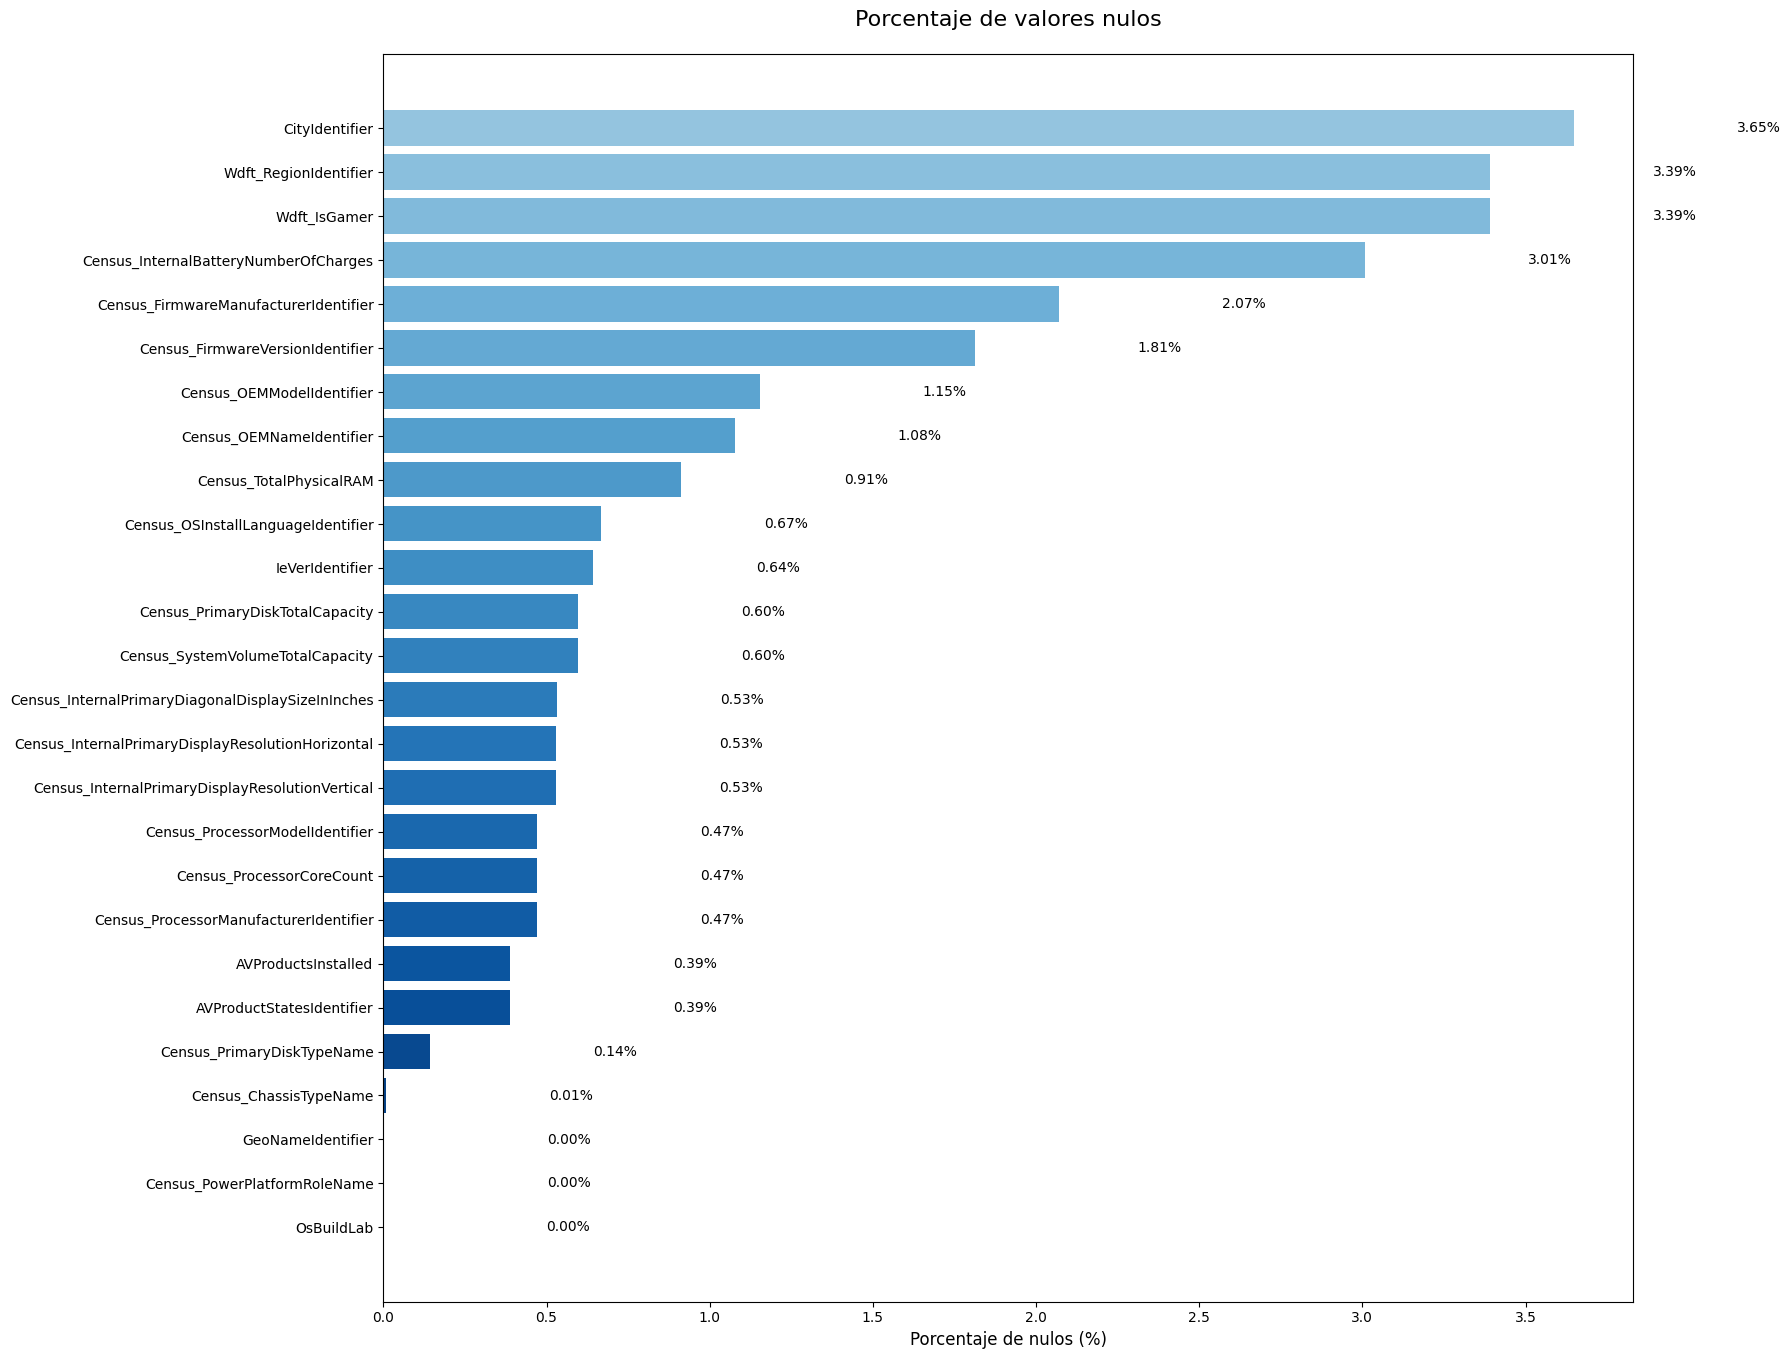

In [ ]:
plot_null_percentages(df)

Dado el porcentaje de nulos que restan pasamos a imputarlos con la moda si son variables categoricas y la mediana si son numericas

In [ ]:
for col in df:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col].fillna(df[col].mode()[0], inplace=True)
    else:
        df[col].fillna(df[col].median(), inplace=True)

<ipython-input-35-72a41c3fba56>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
<ipython-input-35-72a41c3fba56>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [ ]:
df.isnull().sum().sort_values(ascending=False)

MachineIdentifier                                    0
Census_OSInstallTypeName                             0
Census_InternalPrimaryDisplayResolutionHorizontal    0
Census_InternalPrimaryDisplayResolutionVertical      0
Census_PowerPlatformRoleName                         0
Census_InternalBatteryNumberOfCharges                0
Census_OSVersion                                     0
Census_OSBranch                                      0
Census_OSBuildNumber                                 0
Census_OSBuildRevision                               0
Census_OSEdition                                     0
Census_OSSkuName                                     0
Census_OSInstallLanguageIdentifier                   0
Census_ChassisTypeName                               0
Census_OSUILocaleIdentifier                          0
Census_OSWUAutoUpdateOptionsName                     0
Census_GenuineStateName                              0
Census_ActivationChannel                             0
Census_FirmwareManufacturerIdentifier                0
Census_FirmwareVersionIdentifier                     0
Census_IsSecureBootEnabled                           0
Census_IsTouchEnabled                                0
Wdft_IsGamer                                         0
Wdft_RegionIdentifier                                0
Census_InternalPrimaryDiagonalDisplaySizeInInches    0
Census_TotalPhysicalRAM                              0
EngineVersion                                        0
OsPlatformSubRelease                                 0
AppVersion                                           0
AvSigVersion                                         0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
CountryIdentifier                                    0
CityIdentifier                                       0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
OsBuild                                              0
OsSuite                                              0
OsBuildLab                                           0
Census_SystemVolumeTotalCapacity                     0
SkuEdition                                           0
IeVerIdentifier                                      0
Census_MDC2FormFactor                                0
Census_OEMNameIdentifier                             0
Census_OEMModelIdentifier                            0
Census_ProcessorCoreCount                            0
Census_ProcessorManufacturerIdentifier               0
Census_ProcessorModelIdentifier                      0
Census_PrimaryDiskTotalCapacity                      0
Census_PrimaryDiskTypeName                           0
HasDetections                                        0
dtype: int64

## Exploratory Data Analysis

In [ ]:
df.shape

(500000, 51)

In [ ]:
df_column_list = list(df.columns)

In [ ]:
variables_numericas = df.select_dtypes(include=['int64', 'float64'])
variables_categoricas = df.select_dtypes(include=['object', 'category'])

In [ ]:
variables_numericas.shape

(500000, 32)

In [ ]:
variables_categoricas.shape

(500000, 19)

In [ ]:
variables_numericas.columns

Index(['AVProductStatesIdentifier', 'AVProductsInstalled', 'CountryIdentifier',
       'CityIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier',
       'OsBuild', 'OsSuite', 'IeVerIdentifier', 'Census_OEMNameIdentifier',
       'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount',
       'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity',
       'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber',
       'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier',
       'Census_OSUILocaleIdentifier', 'Census_FirmwareManufacturerIdentifier',
       'Census_FirmwareVersionIdentifier', 'Census_IsSecureBootEnabled',
       'Census_IsTouchEnabled', '

In [ ]:
variables_categoricas.columns

Index(['MachineIdentifier', 'EngineVersion', 'AppVersion', 'AvSigVersion',
       'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition',
       'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName',
       'Census_ChassisTypeName', 'Census_PowerPlatformRoleName',
       'Census_OSVersion', 'Census_OSBranch', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName',
       'Census_ActivationChannel'],
      dtype='object')

Acontinuación usamos boxplots y graficos de barras para tener una idea de la distribución de las variables

In [ ]:
def plot_outliers_boxplots(df, columns):
    """
    Visualiza los outliers de múltiples columnas numéricas utilizando boxplots.

    Args:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    columns (list): Lista de nombres de columnas a analizar.

    Returns:
    None
    """
    # Filtrar solo columnas numéricas de la lista proporcionada
    numeric_columns = [col for col in columns if col in df.select_dtypes(include=['number']).columns]

    if not numeric_columns:
        print("No se encontraron columnas numéricas en la lista proporcionada.")
        return

    # Generar un boxplot para cada columna numérica
    for column in numeric_columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=column, color='skyblue')
        plt.title(f"Outliers en la columna: {column}", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.show()

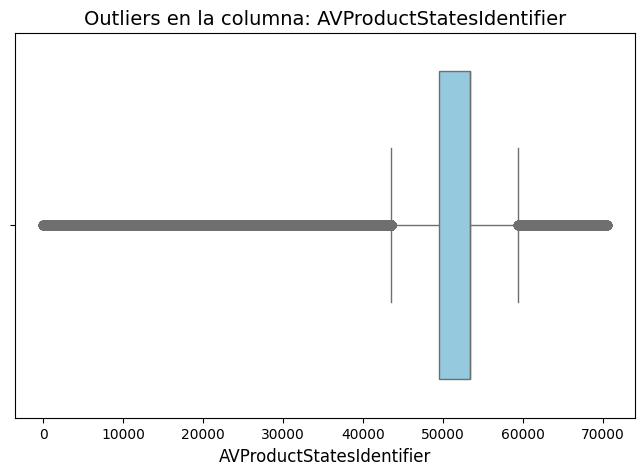

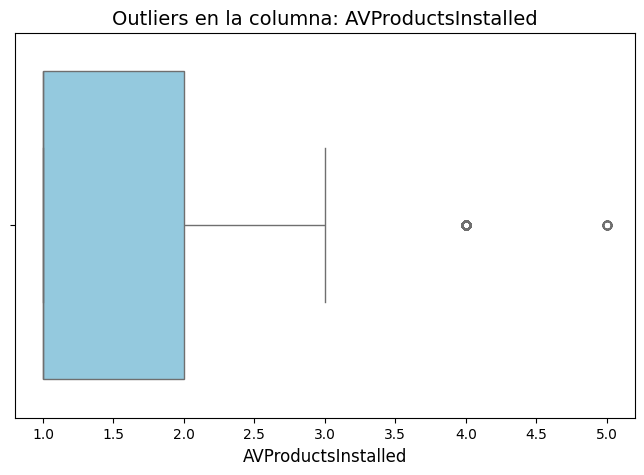

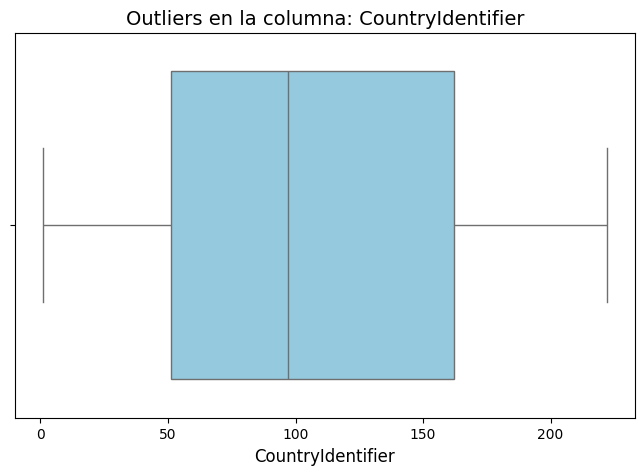

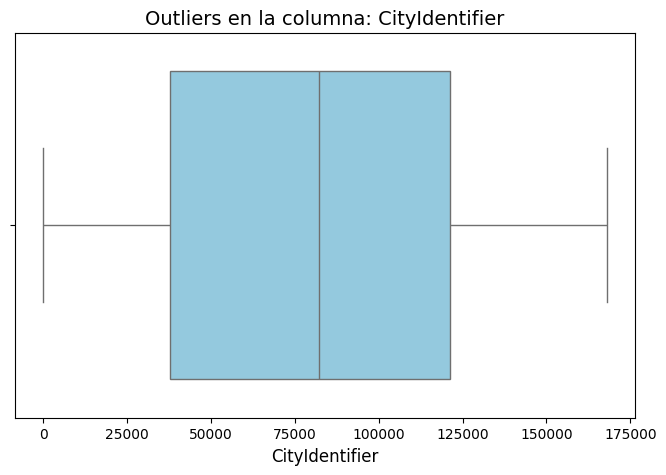

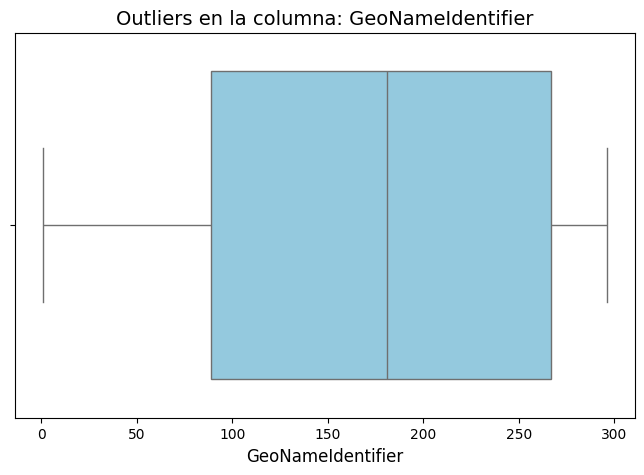

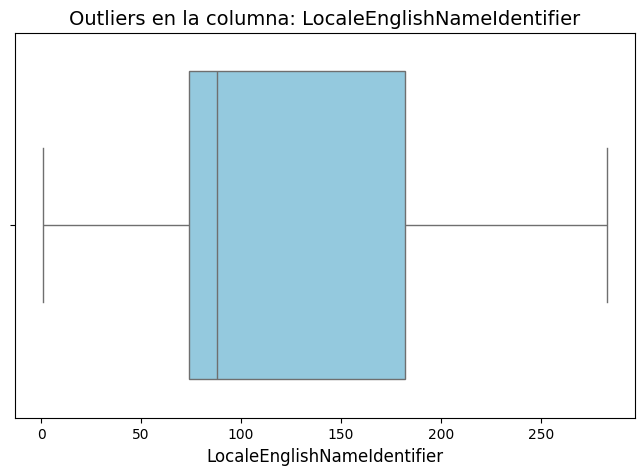

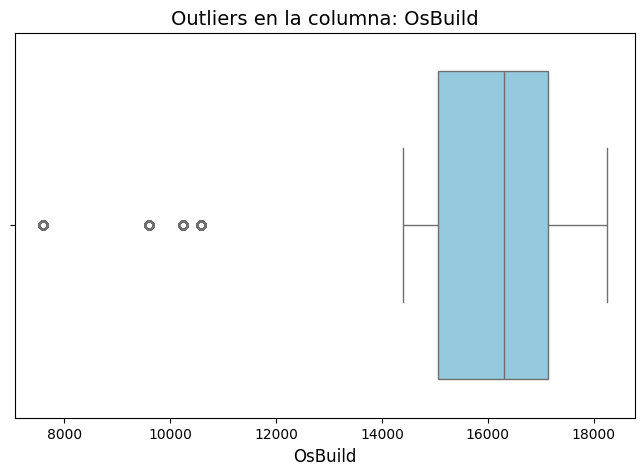

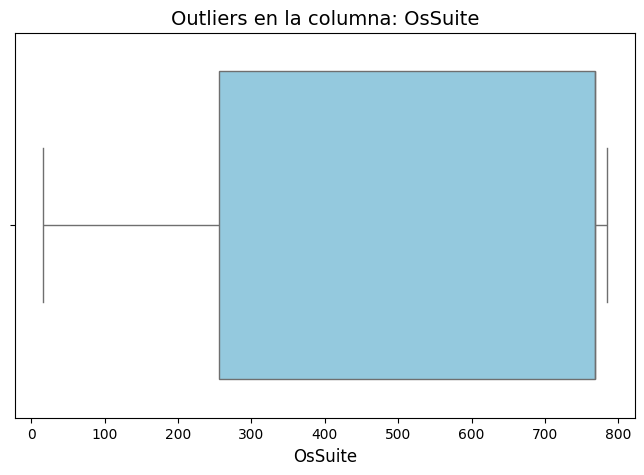

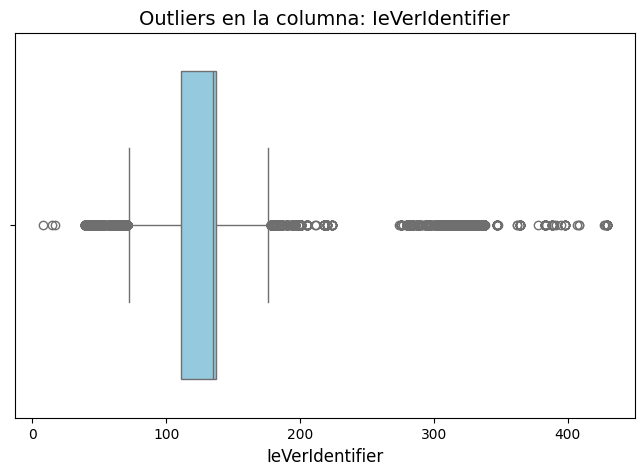

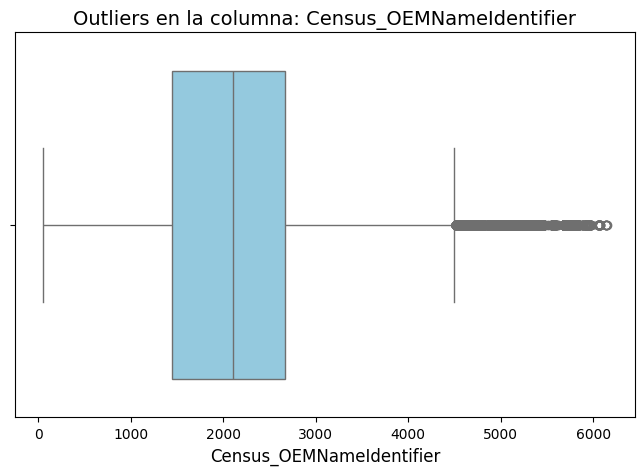

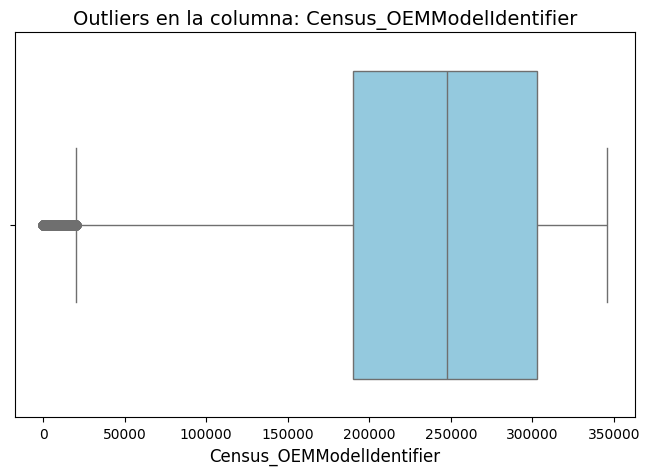

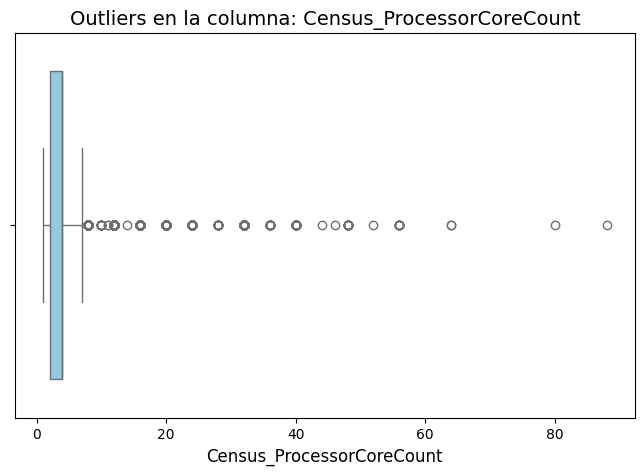

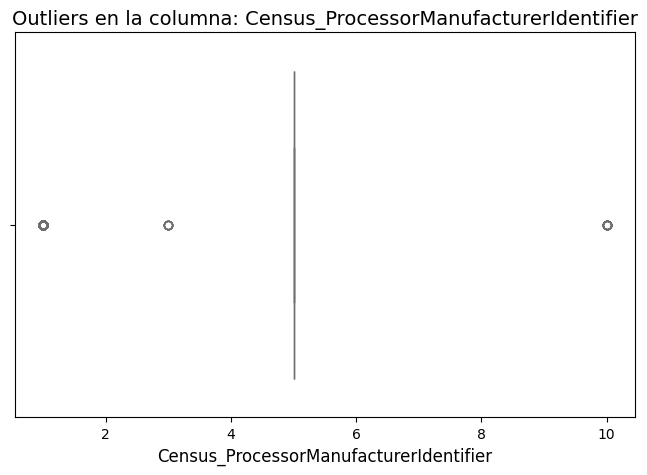

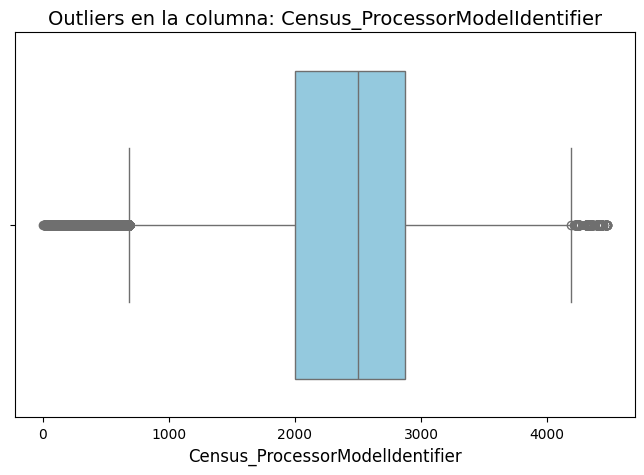

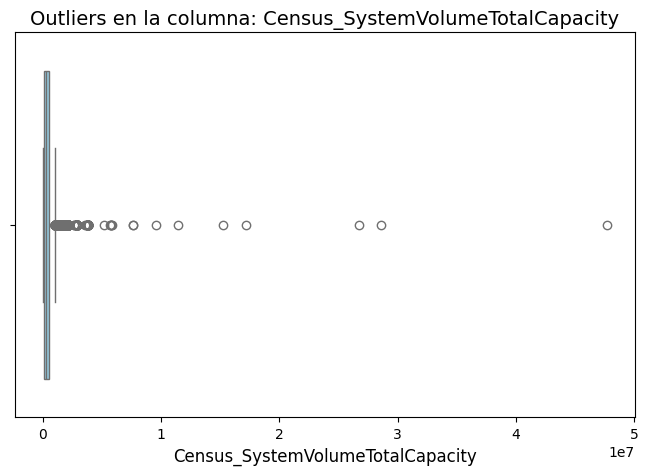

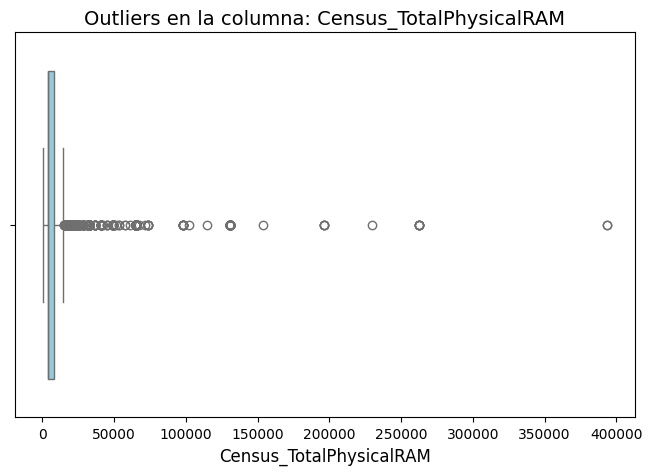

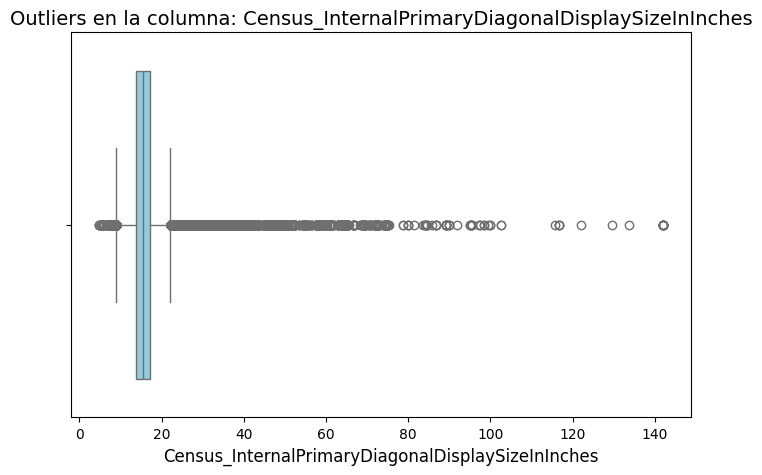

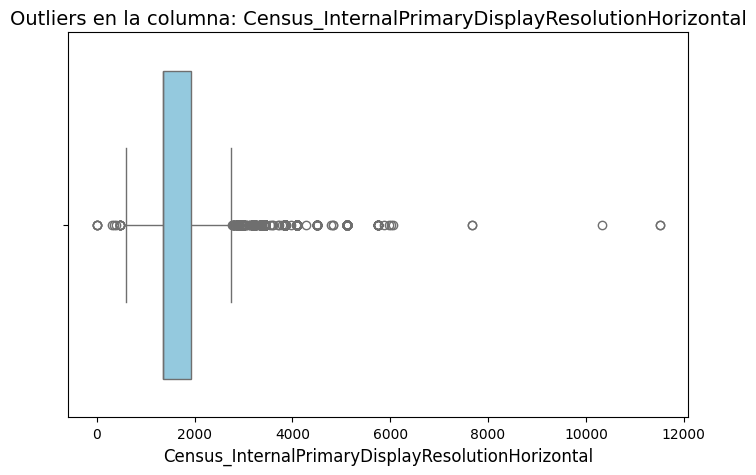

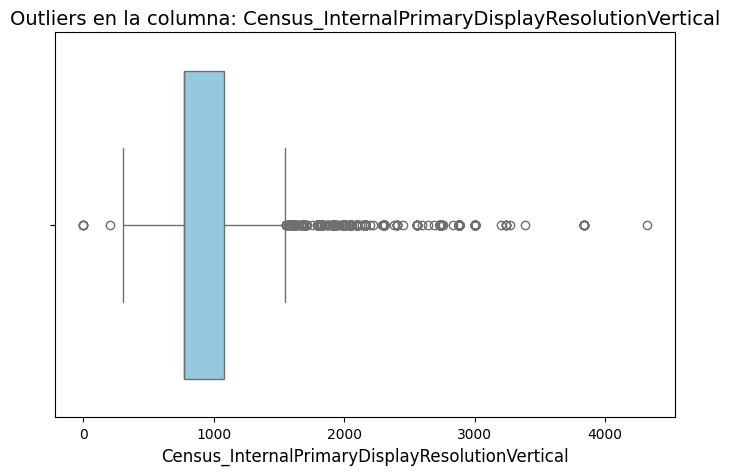

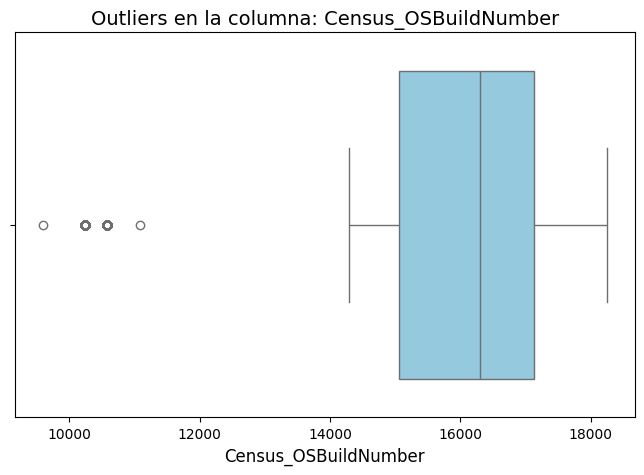

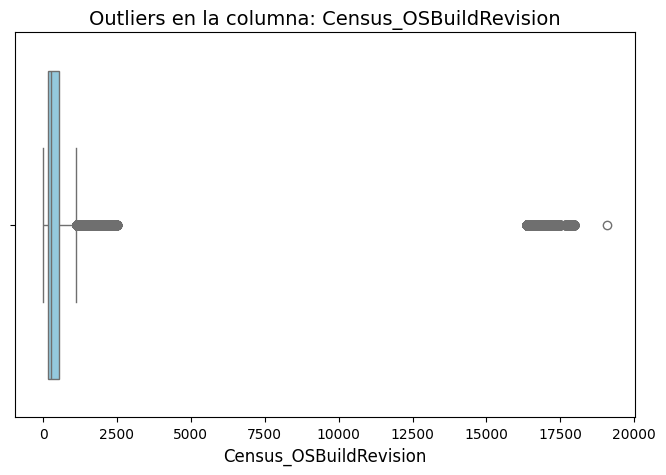

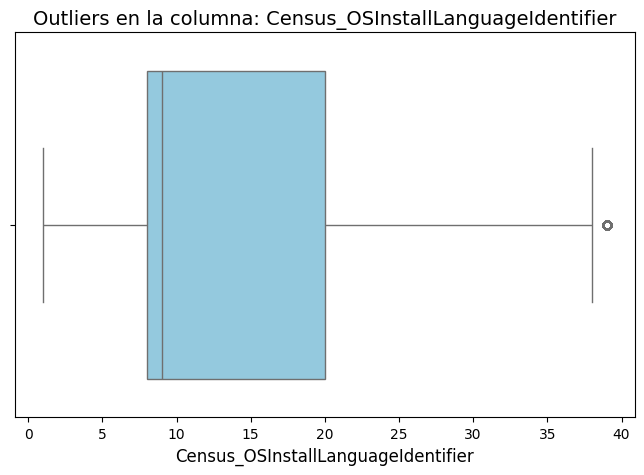

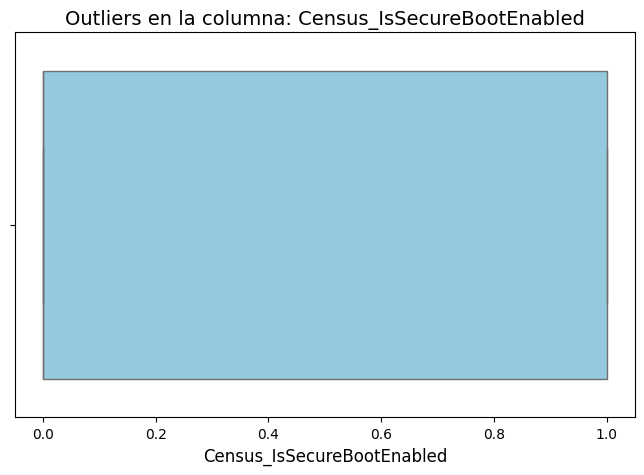

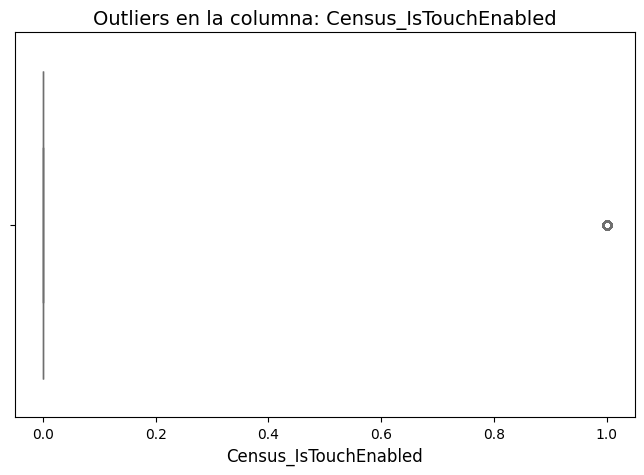

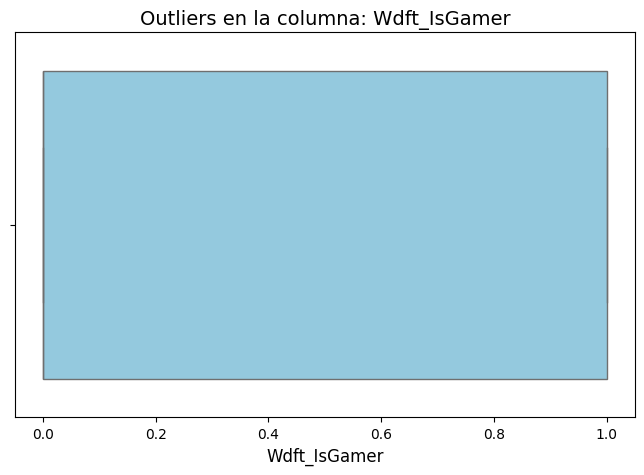

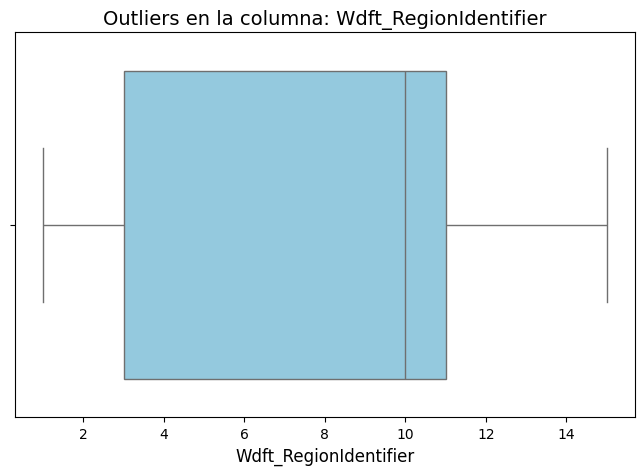

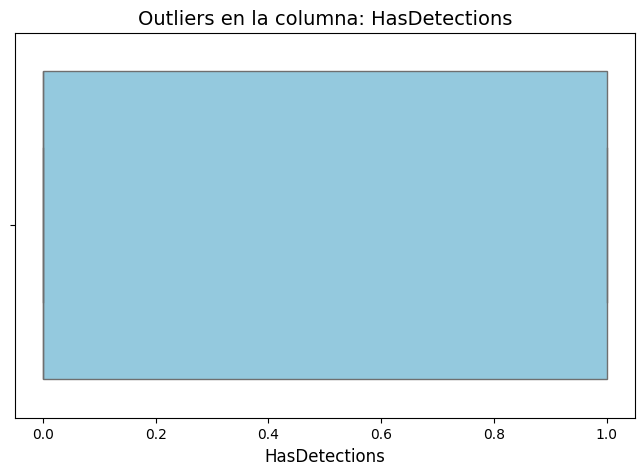

In [ ]:
plot_outliers_boxplots(df, df_column_list)

In [ ]:
def plot_histograms(df, columns, bins=30):
    """
    Visualiza la distribución de múltiples columnas numéricas utilizando histogramas.

    Args:
    df (pd.DataFrame): El DataFrame que contiene los datos.
    columns (list): Lista de nombres de columnas a analizar.
    bins (int): Número de bins para los histogramas.

    Returns:
    None
    """
    # Filtrar solo columnas numéricas de la lista proporcionada
    numeric_columns = [col for col in columns if col in df.select_dtypes(include=['number']).columns]

    if not numeric_columns:
        print("No se encontraron columnas numéricas en la lista proporcionada.")
        return

    # Iterar sobre las columnas numéricas y graficar histogramas
    for column in numeric_columns:
        plt.figure(figsize=(8, 5))
        plt.hist(df[column], bins=bins, color='orange', edgecolor='black', alpha=0.7)
        plt.title(f"Distribución de la columna: {column}", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel("Frecuencia", fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

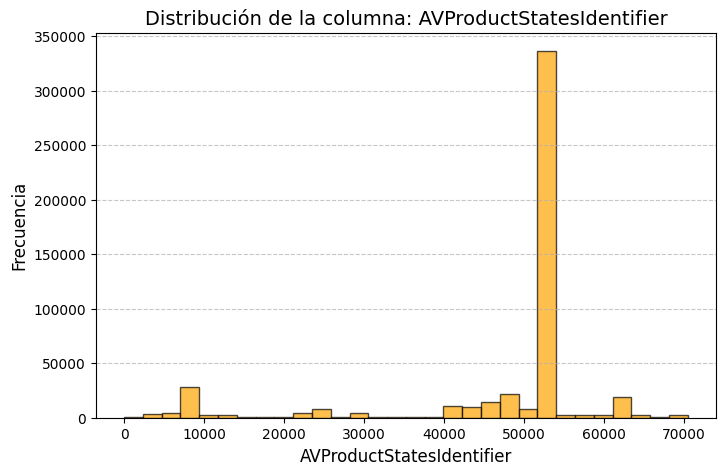

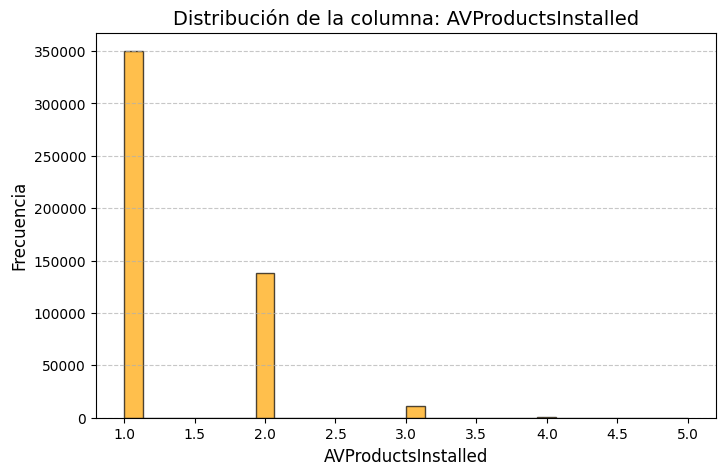

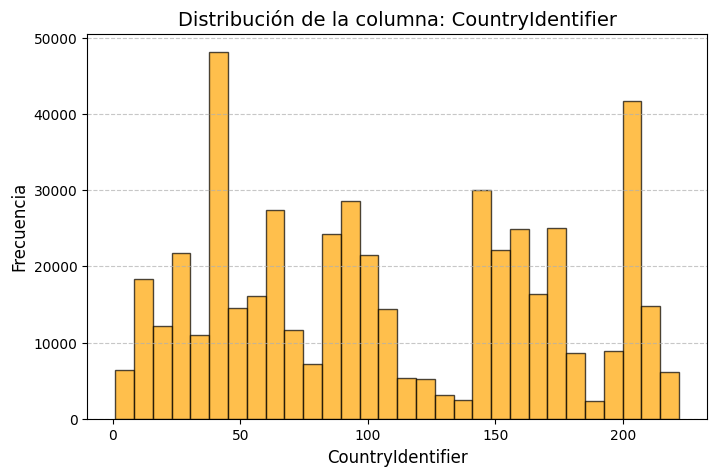

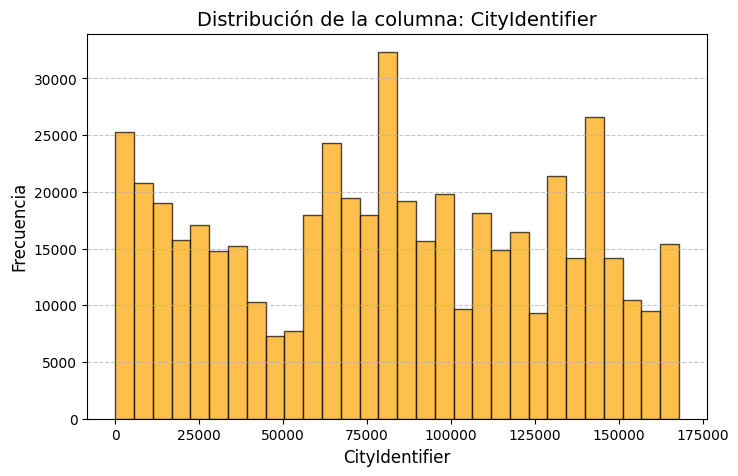

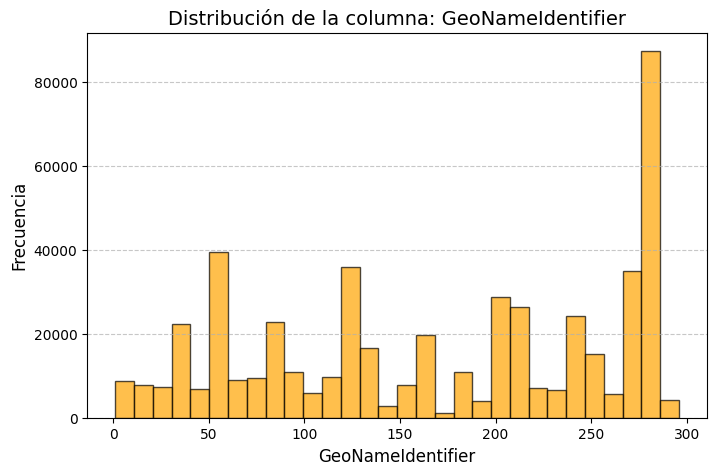

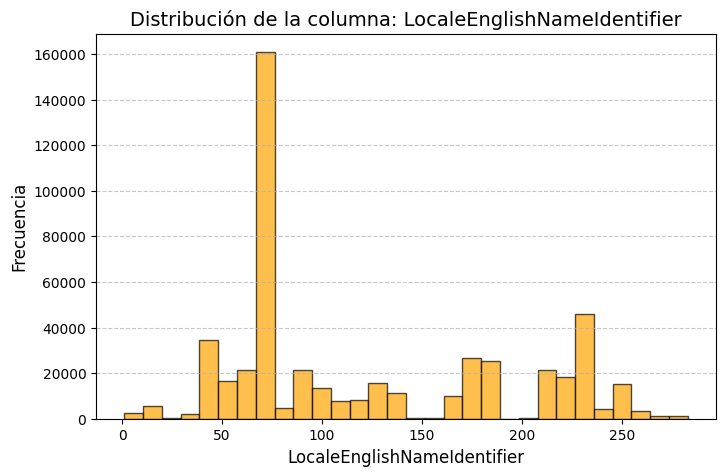

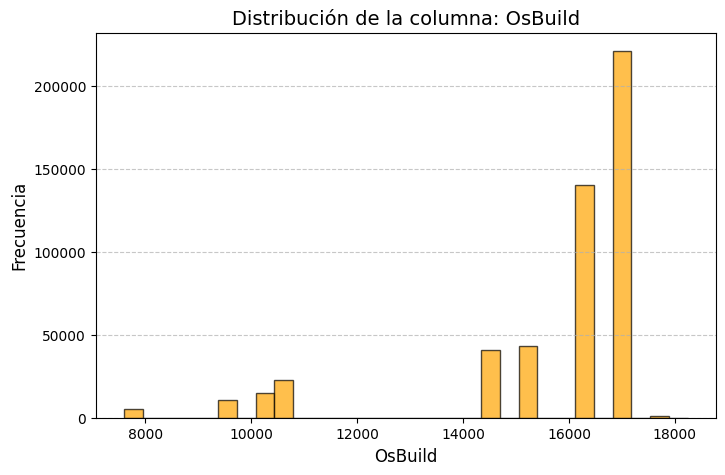

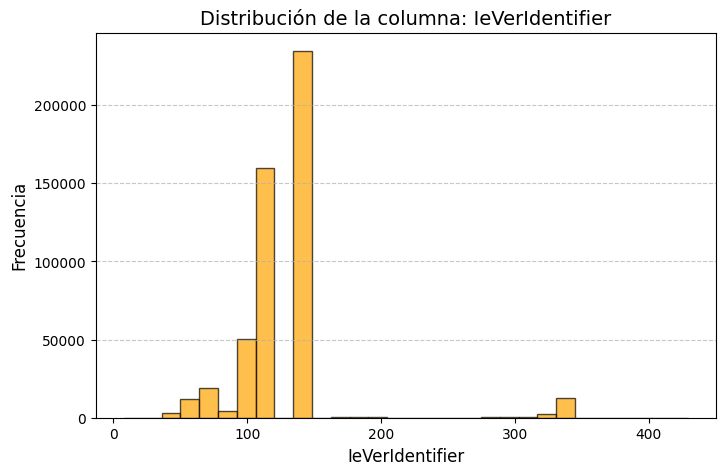

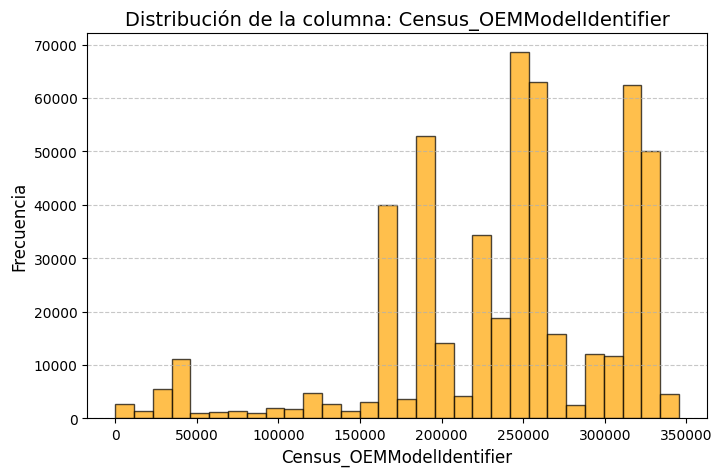

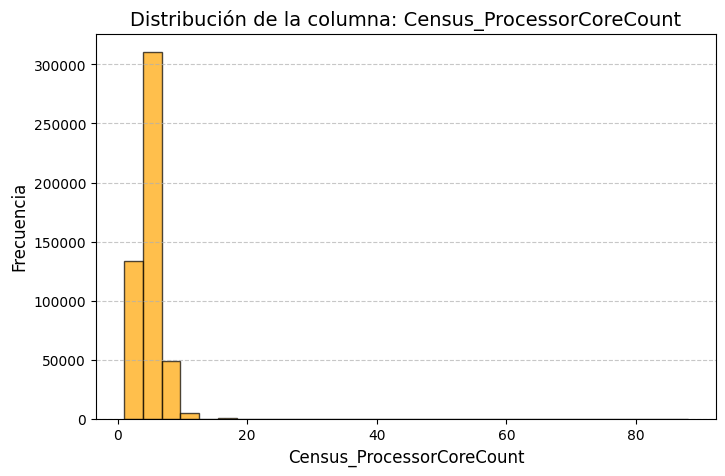

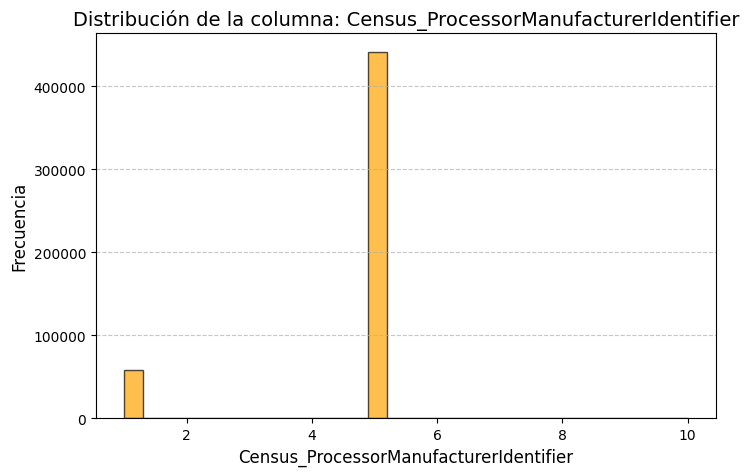

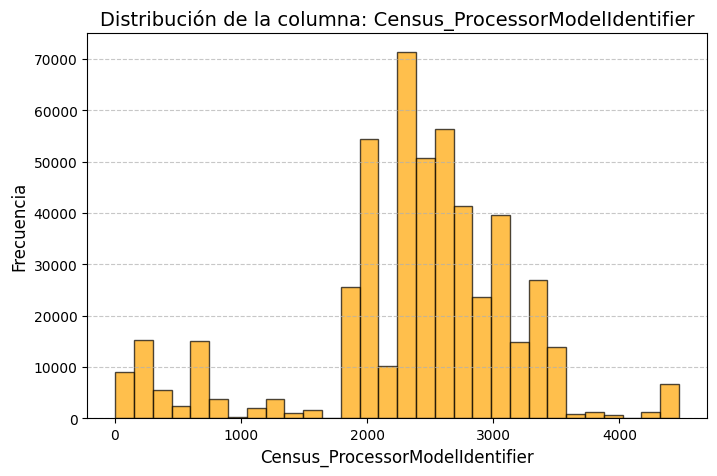

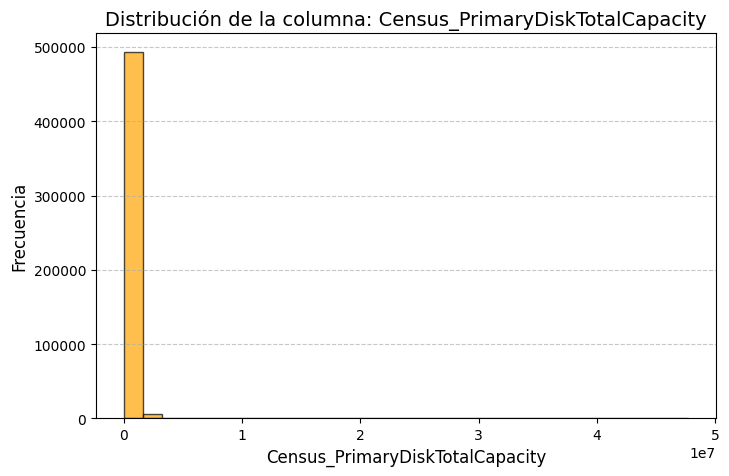

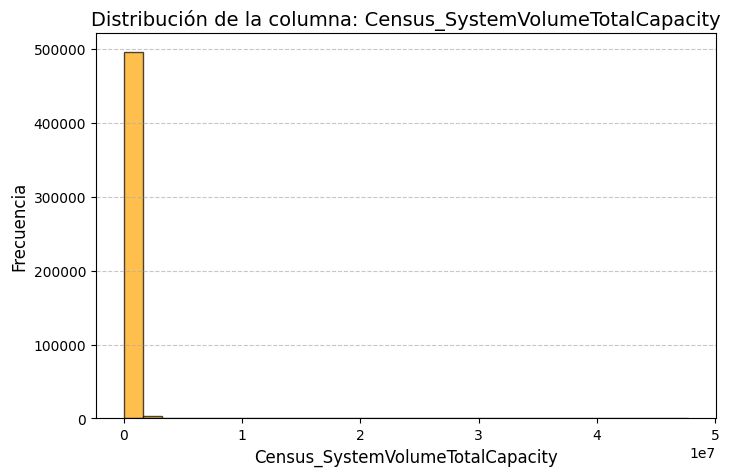

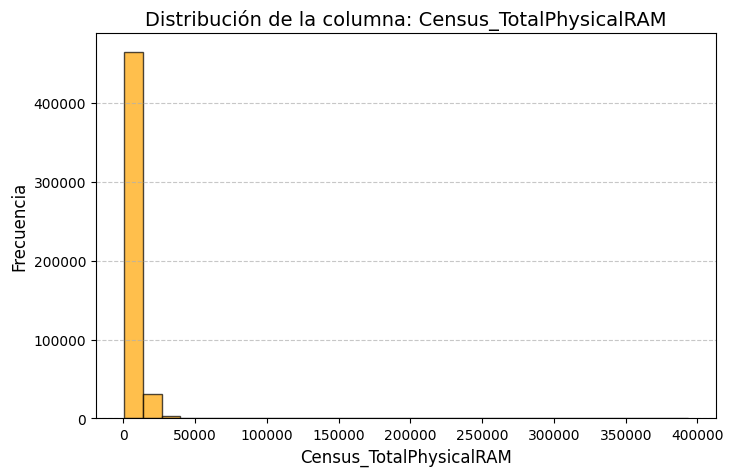

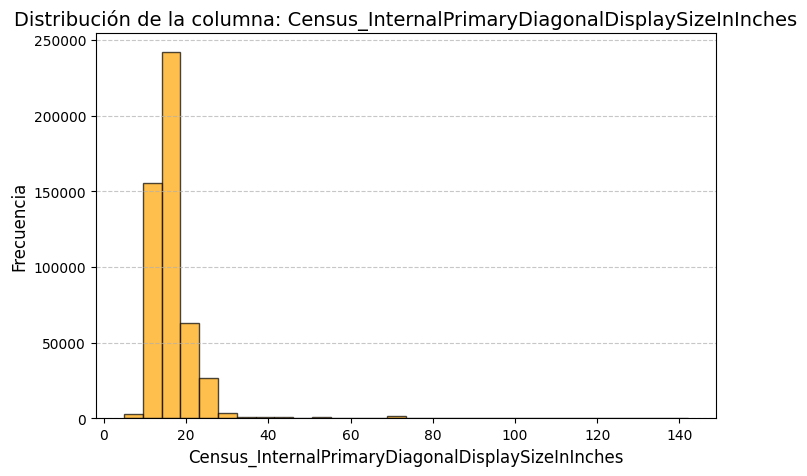

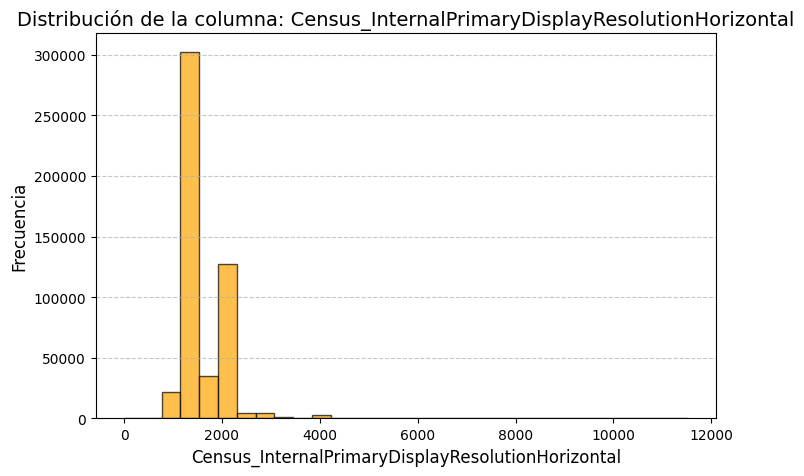

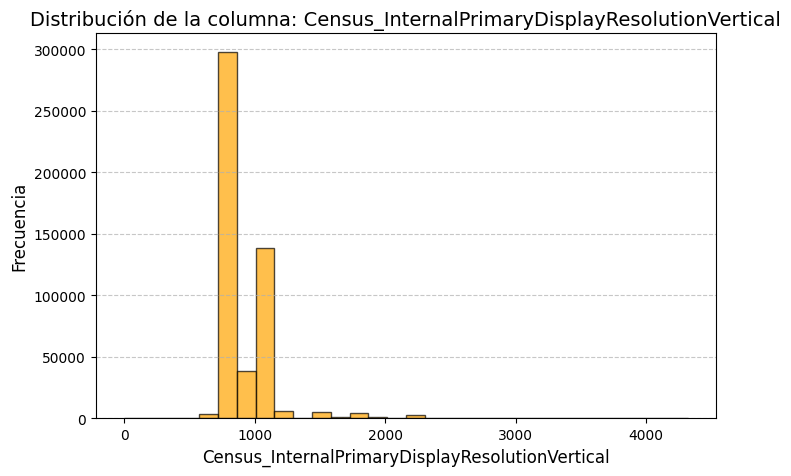

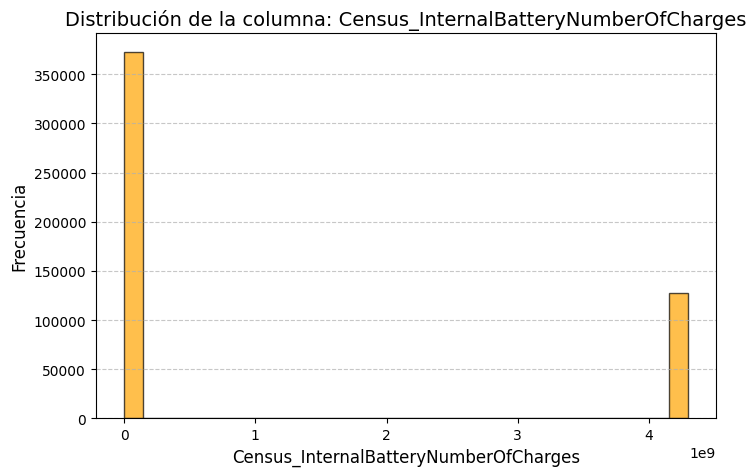

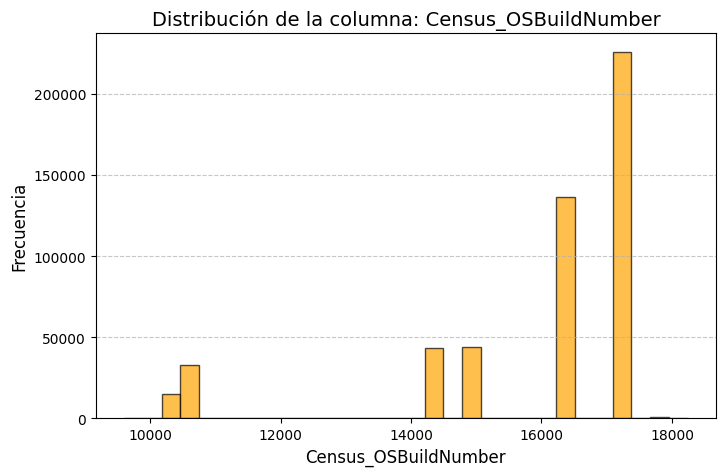

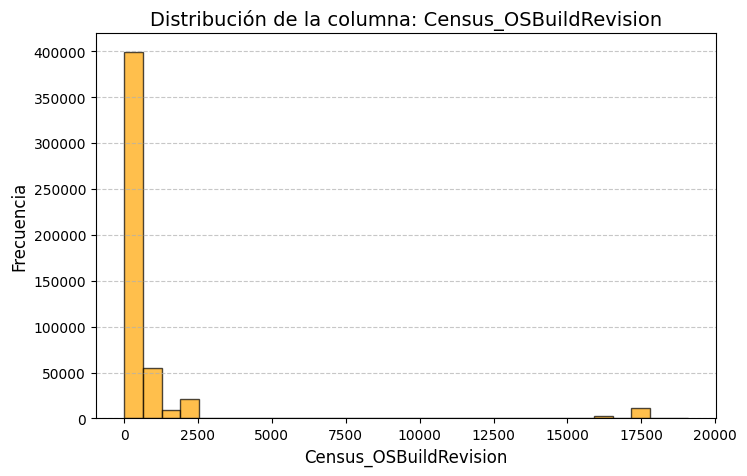

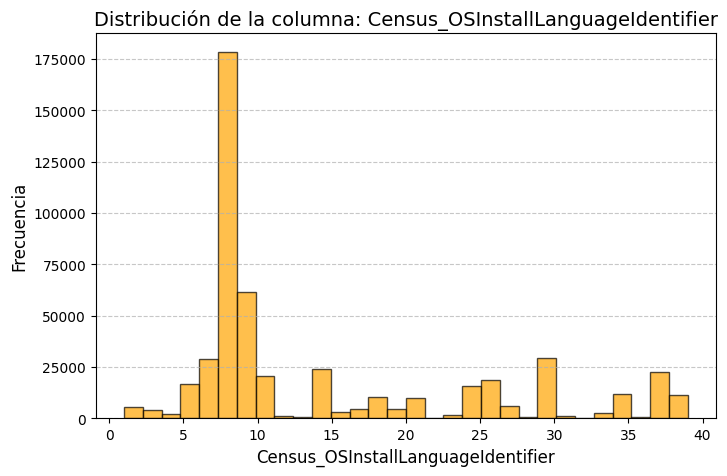

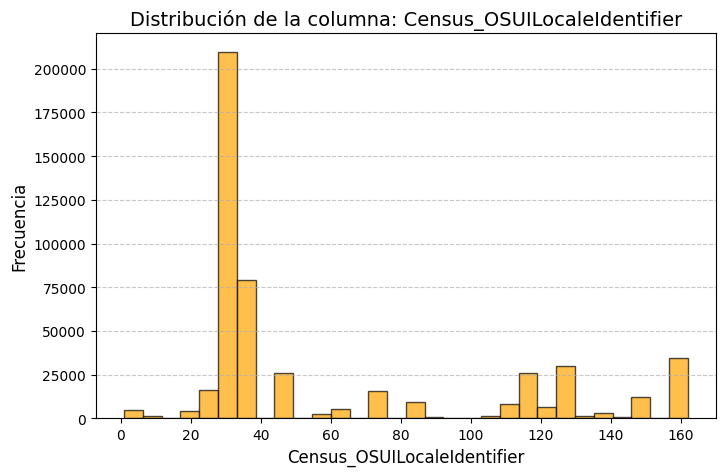

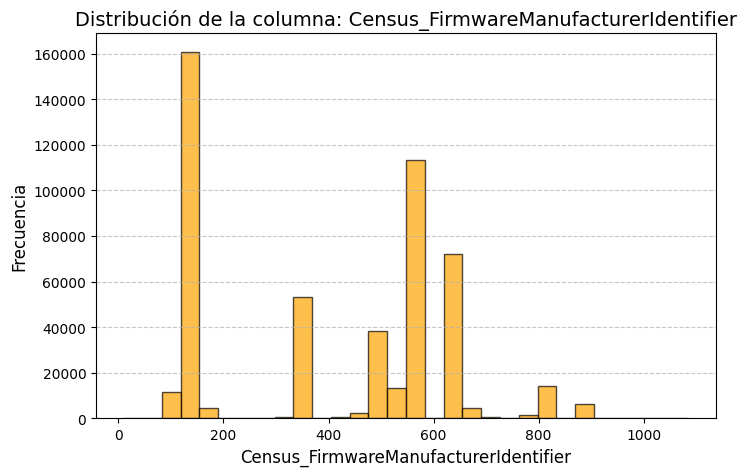

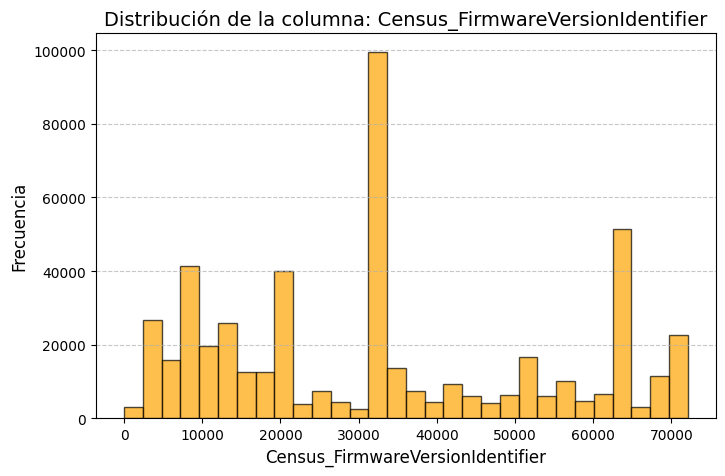

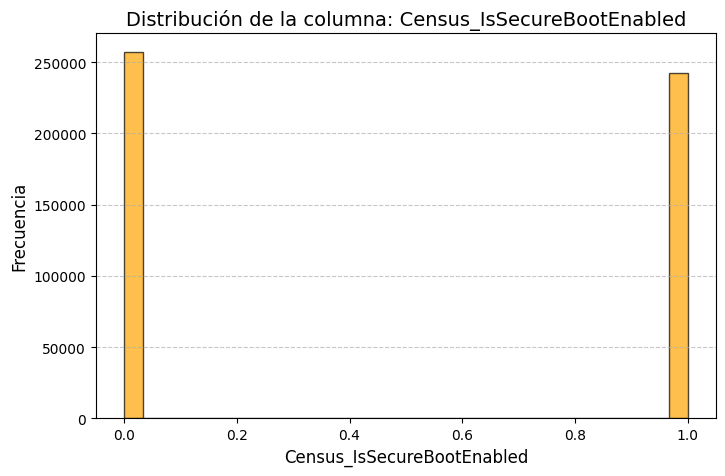

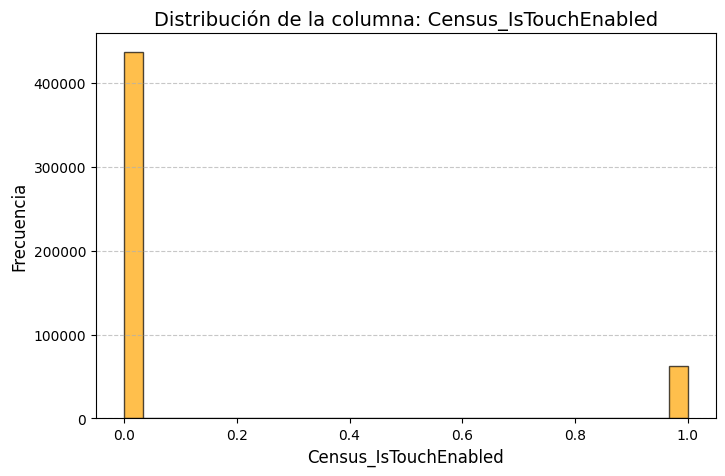

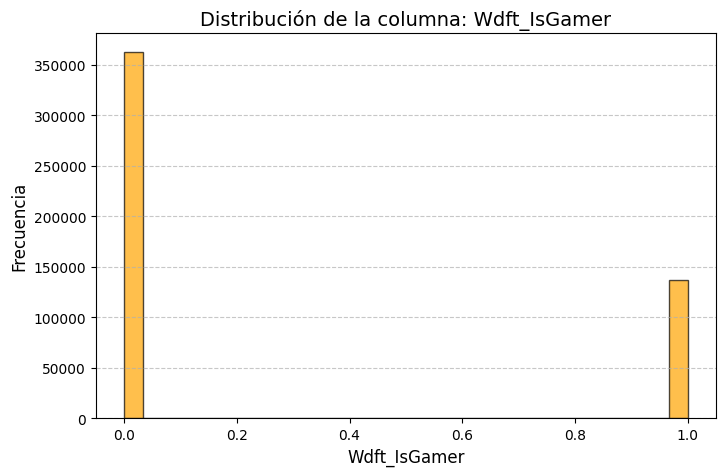

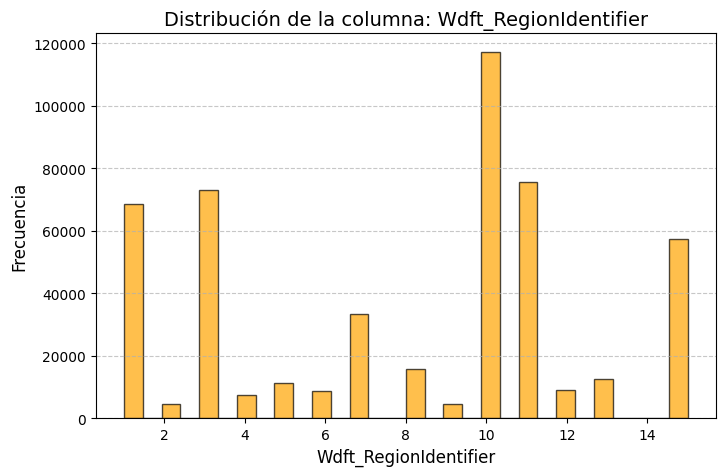

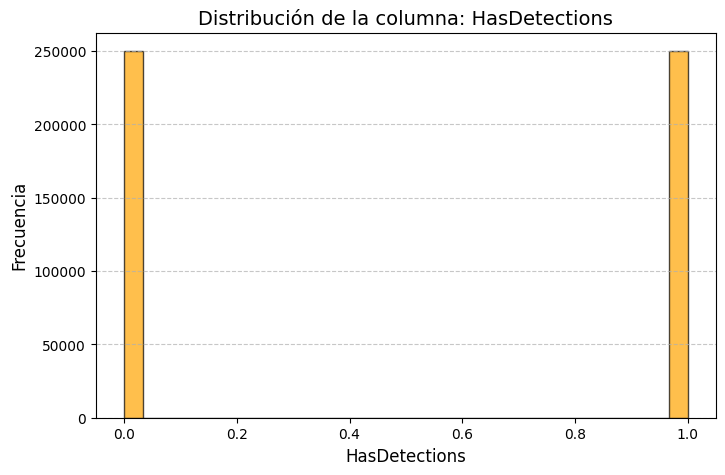

In [ ]:
plot_histograms(df, df_column_list)

In [ ]:
def plot_variable_distribution(df):
    """
    Muestra un gráfico de pastel con el porcentaje de variables binarias, categóricas y numéricas en el DataFrame.

    """
    # Clasificar las columnas por tipo
    binary_cols = [col for col in df.columns if df[col].nunique() == 2]  # Variables con exactamente dos valores únicos
    numeric_cols = df.select_dtypes(include=['number']).columns.difference(binary_cols)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.difference(binary_cols)

    # Contar el número de columnas de cada tipo
    counts = {
        'Binarias': len(binary_cols),
        'Numéricas': len(numeric_cols),
        'Categóricas': len(categorical_cols)
    }

    # Generar el gráfico de pastel
    plt.figure(figsize=(8, 6))
    plt.pie(
        counts.values(),
        labels=counts.keys(),
        autopct='%1.1f%%',
        colors=['#66c2a5', '#fc8d62', '#8da0cb'],
        startangle=140,
        wedgeprops={'edgecolor': 'black'}
    )
    plt.title('Distribución de tipos de variables en el DataFrame', fontsize=14)
    plt.show()

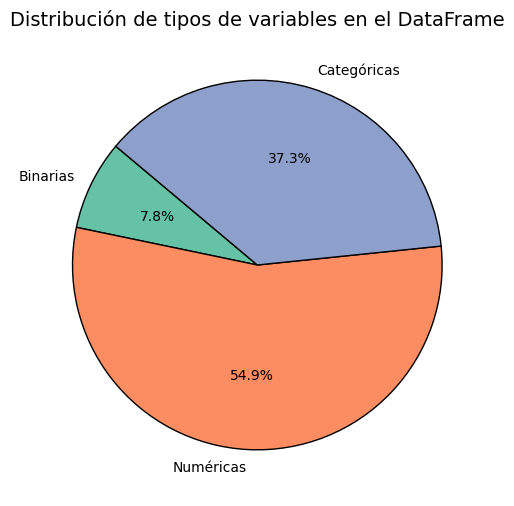

In [ ]:
plot_variable_distribution(df)

In [ ]:
def plot_numeric_correlations(df, method='pearson', base_size=1.5):
    """
    Calcula y muestra un mapa de calor con las correlaciones entre las variables numéricas de un DataFrame.
    Ajusta automáticamente el tamaño de la figura según la cantidad de variables.

    """
    # Seleccionar solo columnas numéricas
    numeric_df = df.select_dtypes(include=['number'])

    # Calcular la matriz de correlaciones
    corr_matrix = numeric_df.corr(method=method)

    # Ajustar dinámicamente el tamaño del gráfico
    num_vars = len(corr_matrix.columns)
    figsize = (base_size * num_vars, base_size * num_vars)

    # Visualizar con un mapa de calor
    plt.figure(figsize=figsize)
    sns.heatmap(
        corr_matrix,
        annot=True,
        fmt='.2f',
        cmap='coolwarm',
        cbar=True,
        square=True,
        linewidths=0.5
    )
    plt.title(f'Matriz de Correlación ({method.capitalize()})', fontsize=14)
    plt.show()

    return corr_matrix

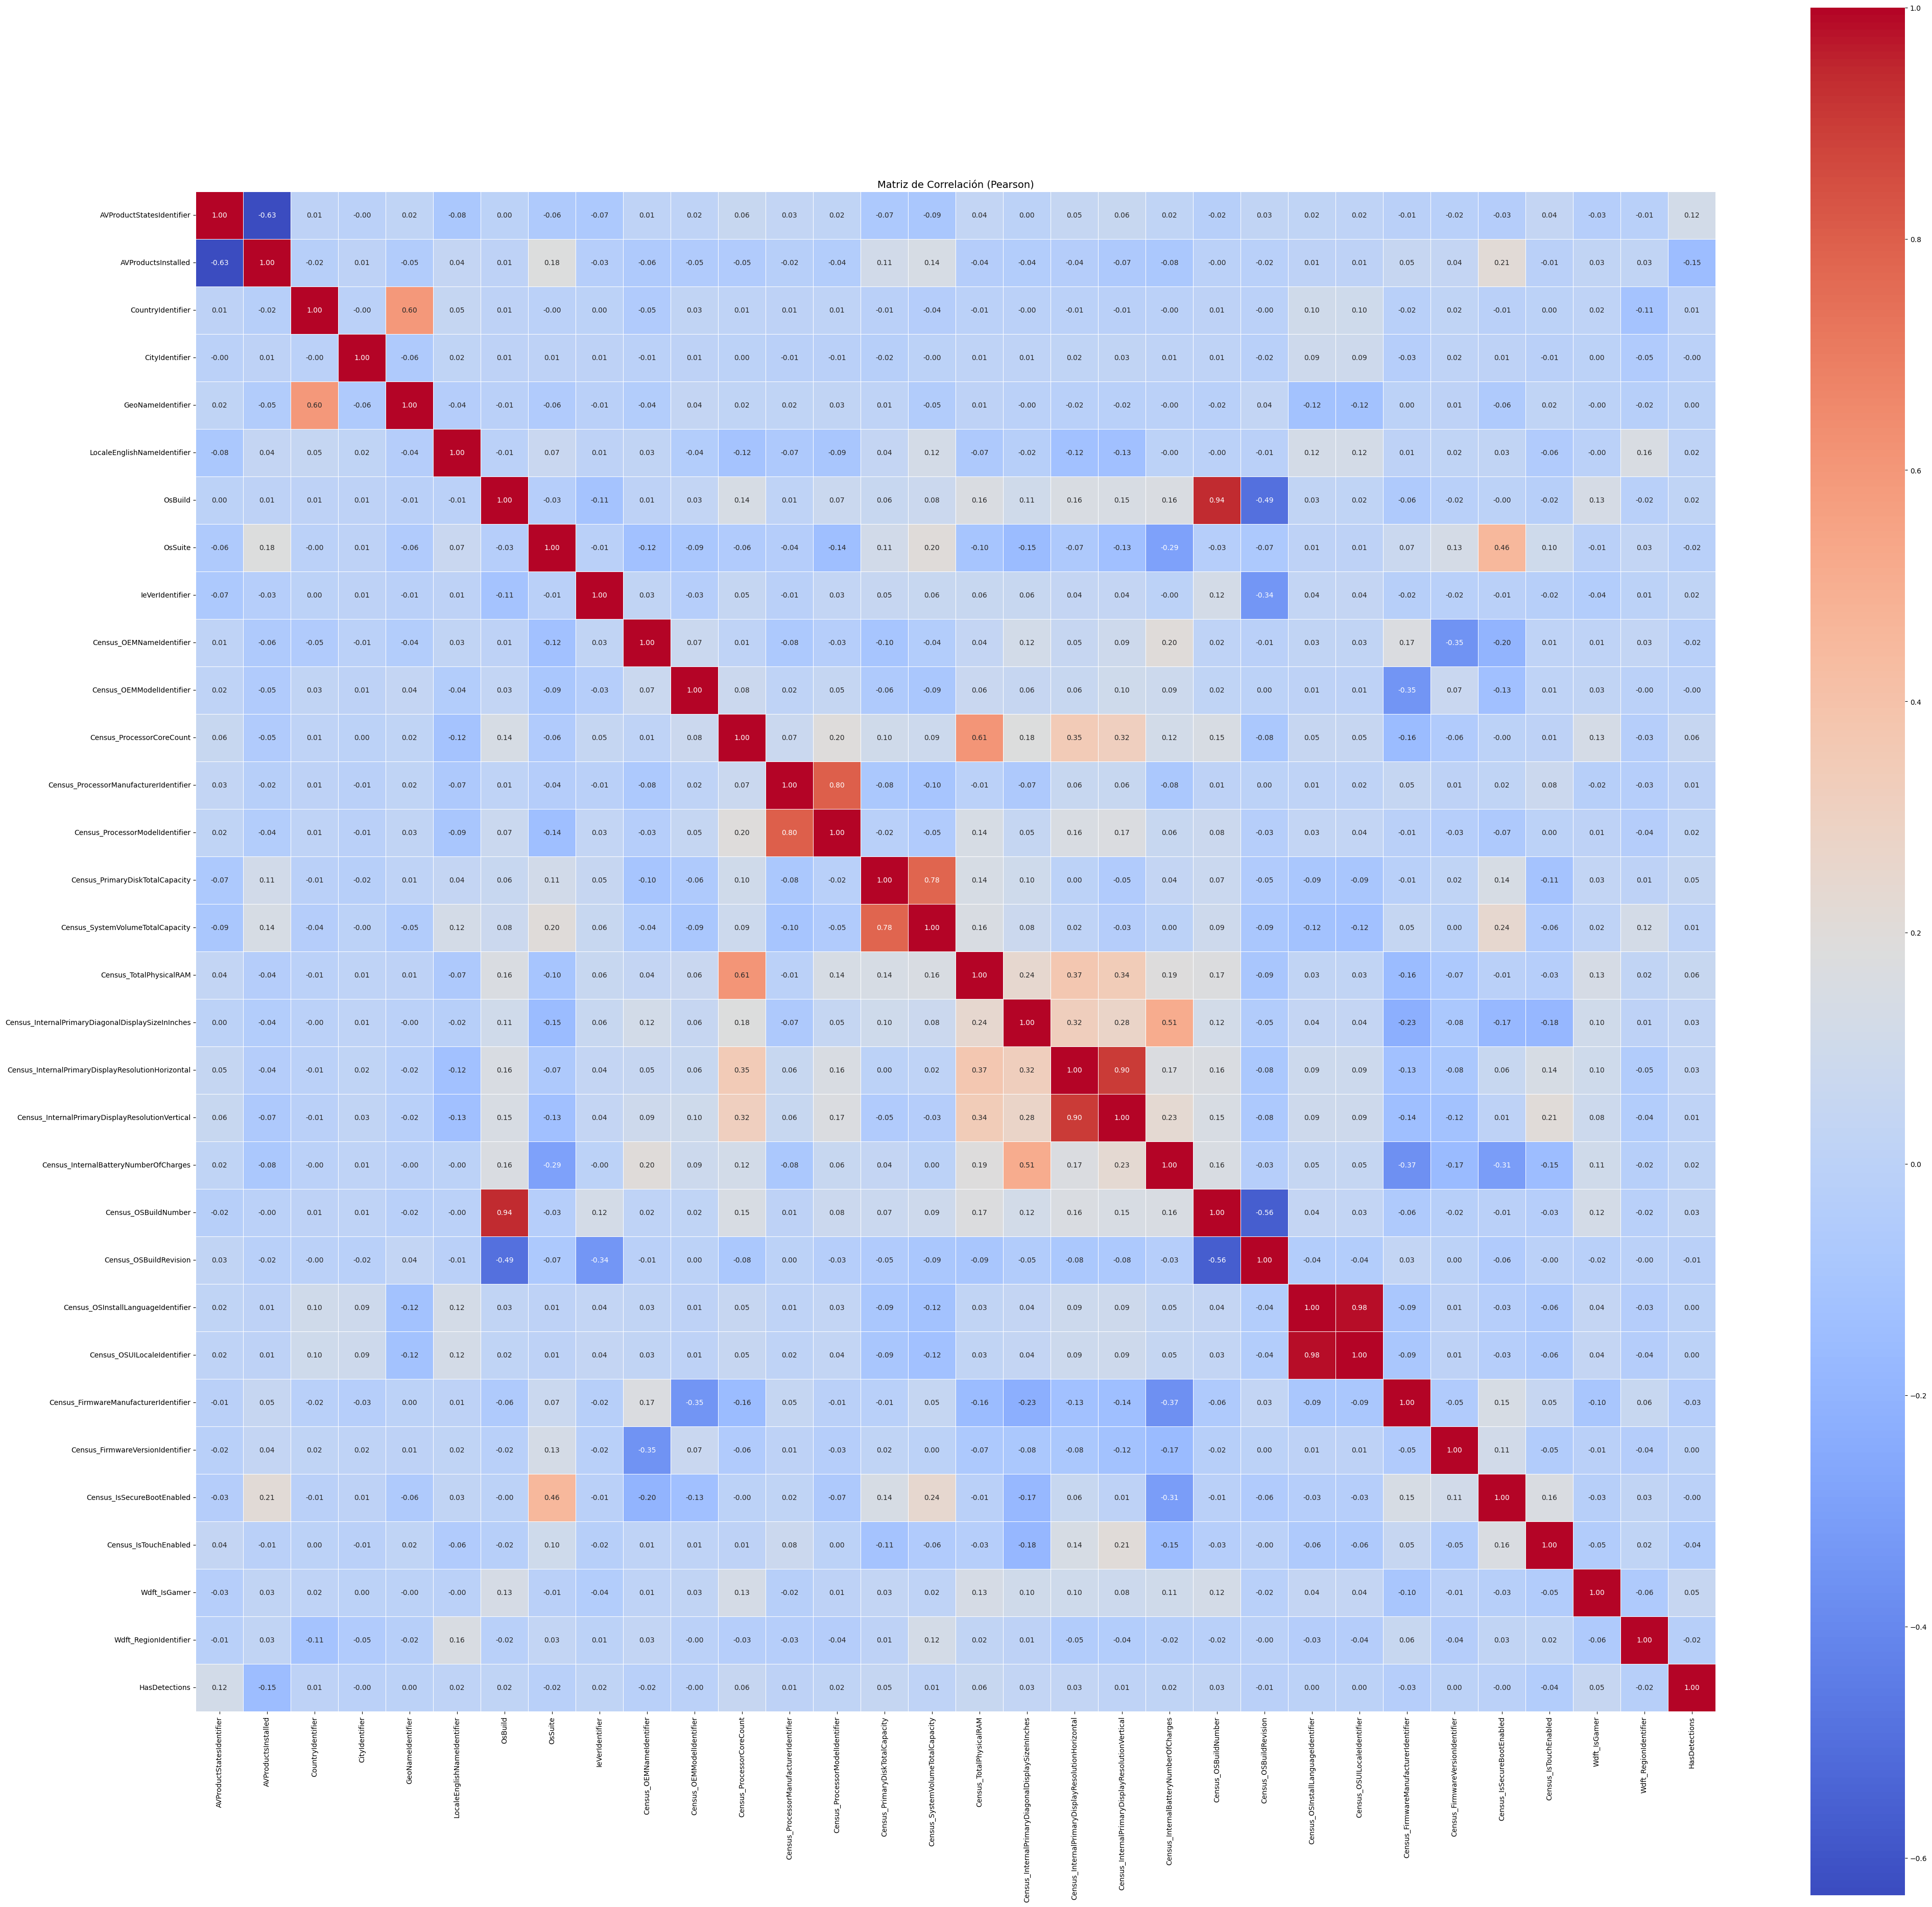

In [ ]:
corr_matrix = plot_numeric_correlations(df)

### Tratamiento de categoricas

In [ ]:
list(variables_categoricas)

['MachineIdentifier',
 'EngineVersion',
 'AppVersion',
 'AvSigVersion',
 'OsPlatformSubRelease',
 'OsBuildLab',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSVersion',
 'Census_OSBranch',
 'Census_OSEdition',
 'Census_OSSkuName',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

In [ ]:
df_object = df.select_dtypes(include=['object','category'])

In [ ]:
df_object.head()

MachineIdentifier EngineVersion       AppVersion  \
0  f1cd864e97bae82bdf96523e1a539121   1.1.15100.1  4.18.1807.18075   
1  fd5ba6f5b75325ec0423a6c67cc75942   1.1.15100.1  4.18.1807.18075   
2  4e628391e7cc7c482fb3286f486dbd25   1.1.15100.1   4.9.10586.1106   
3  270a2e9d028144a4df12a9e3da79fba5   1.1.15200.1  4.18.1807.18075   
4  06ca8fa8d32c2abdc5b3577d676b3269   1.1.15200.1  4.18.1807.18075   

   AvSigVersion OsPlatformSubRelease  \
0  1.273.1234.0                  rs4   
1  1.273.1282.0                  rs4   
2   1.273.781.0                  th2   
3  1.275.1639.0                  rs4   
4   1.275.511.0                  rs4   

                                        OsBuildLab SkuEdition  \
0         17134.1.amd64fre.rs4_release.180410-1804        Pro   
1         17134.1.amd64fre.rs4_release.180410-1804        Pro   
2  10586.1176.amd64fre.th2_release_sec.170913-1848       Home   
3         17134.1.amd64fre.rs4_release.180410-1804       Home   
4         17134.1.amd64fre.rs4_release.180410-1804        Pro   

  Census_MDC2FormFactor Census_PrimaryDiskTypeName Census_ChassisTypeName  \
0               Desktop                        HDD               AllinOne   
1              Notebook                        HDD               Notebook   
2           Convertible                        SSD               Notebook   
3              Notebook                        SSD               Notebook   
4              Notebook                        HDD               Portable   

  Census_PowerPlatformRoleName Census_OSVersion  Census_OSBranch  \
0                      Desktop   10.0.17134.165      rs4_release   
1                       Mobile   10.0.17134.165      rs4_release   
2                       Mobile  10.0.10586.1176  th2_release_sec   
3                       Mobile   10.0.17134.286      rs4_release   
4                       Mobile   10.0.17134.228      rs4_release   

  Census_OSEdition Census_OSSkuName Census_OSInstallTypeName  \
0     Professional     PROFESSIONAL               UUPUpgrade   
1     Professional     PROFESSIONAL               UUPUpgrade   
2             Core             CORE                   Update   
3             Core             CORE                 IBSClean   
4     Professional     PROFESSIONAL                   Update   

  Census_OSWUAutoUpdateOptionsName Census_GenuineStateName  \
0                         FullAuto              IS_GENUINE   
1                         FullAuto              IS_GENUINE   
2                           Notify              IS_GENUINE   
3                         FullAuto              IS_GENUINE   
4                         FullAuto              IS_GENUINE   

  Census_ActivationChannel  
0                   OEM:DM  
1                   OEM:DM  
2                   Retail  
3                   Retail  
4                   OEM:DM

#### Census_OSEdition

In [ ]:
df.set_index('MachineIdentifier', inplace=True)

In [ ]:
df[['Census_OSEdition', 'Census_OSSkuName']].head(20)

Census_OSEdition      Census_OSSkuName
MachineIdentifier                                                          
f1cd864e97bae82bdf96523e1a539121         Professional          PROFESSIONAL
fd5ba6f5b75325ec0423a6c67cc75942         Professional          PROFESSIONAL
4e628391e7cc7c482fb3286f486dbd25                 Core                  CORE
270a2e9d028144a4df12a9e3da79fba5                 Core                  CORE
06ca8fa8d32c2abdc5b3577d676b3269         Professional          PROFESSIONAL
6c3ff3036d3ecc96729a615653742608                 Core                  CORE
8ab73b7f8dbb0d0d57f54a8b4799e960                 Core                  CORE
1c4ec21828b563afb6b0aa72ef88926d  CoreCountrySpecific  CORE_COUNTRYSPECIFIC
0b247aa88737776d0f88ce4dee447216                 Core                  CORE
cc9e1141a127a305cddc17baaa36bcb3         Professional          PROFESSIONAL
1843aa258152c018f0298a8ba9915ebd                 Core                  CORE
9d1dc31365febf655fcf01aa5076f546                 Core                  CORE
4458ad1edb42d5f05ac868afa37f628e   CoreSingleLanguage   CORE_SINGLELANGUAGE
8a24377c5d9769db1802dd355a38d2cb   CoreSingleLanguage   CORE_SINGLELANGUAGE
b8903724cf2bea8d61db07713d54fd11         Professional          PROFESSIONAL
5cf61e2c98c3d9becaa46eb4a99996ef         Professional          PROFESSIONAL
aad1e798db865780f340539c0429934d         Professional          PROFESSIONAL
f2203748ea4c33c38acd8ee26442c35e                 Core                  CORE
eaa1b0097a1265915dfe8a17e4bb08be   CoreSingleLanguage   CORE_SINGLELANGUAGE
503ff9f5e17315afd880eb6745316439         Professional          PROFESSIONAL

In [ ]:
df[['Census_OSEdition', 'Census_OSSkuName']].tail(20)

Census_OSEdition     Census_OSSkuName
MachineIdentifier                                                        
2b479d8daf3ef7765d321859e17fb852  CoreSingleLanguage  CORE_SINGLELANGUAGE
b07405dbe102c54f99f122ab220dd2bb                Core                 CORE
edc61d4587a82c9fe420877a676868d4                Core                 CORE
41511160f407cf64af33b0ae2a3b55e1                Core                 CORE
6eea43edf66a2b5201131e2bf011a287                Core                 CORE
5095d4649f1019b58ae82956653ff6e0                Core                 CORE
4d787ed8d8990bf721a96fba3fdb5054        Professional         PROFESSIONAL
fe9575ddf8a53d099dd3cb5f7193288b                Core                 CORE
1b8d39b74872ef5de9f9c9ca43424d79        Professional         PROFESSIONAL
7bfa76072db3b0c18503f12f6ac2cdcb  CoreSingleLanguage  CORE_SINGLELANGUAGE
baecaa76580b2f96e7a319d3521bcdc8        Professional         PROFESSIONAL
3df610b8bec46c7af0dd50c74756bf7e  CoreSingleLanguage  CORE_SINGLELANGUAGE
1e395f5a138a77514322a1201de81a27        Professional         PROFESSIONAL
d7f1b593177768d66a2905b09a43a4d5        Professional         PROFESSIONAL
a687cfd1252ee03ce9658eaf15bdf40e                Core                 CORE
a739cacc292f3f1e745827c1ca6c6ada                Core                 CORE
a4c232d528d98343e8f1b73650da7b82                Core                 CORE
fd16cd542d660848d272e4552bcccb1e        Professional         PROFESSIONAL
fa0841f8f6147de7c3d287e05270ed42        Professional         PROFESSIONAL
7b45dc3537e17f16305c5983ca0a1cb9        Professional         PROFESSIONAL

Acontinuación vemos la relación entre las variables categoricas

In [ ]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = contingency_table.sum().sum()
    r, k = contingency_table.shape
    return np.sqrt(chi2 / (n * (min(k-1, r-1))))

# Calcular Cramér V
cramers_v_score = cramers_v(df['Census_OSEdition'], df['Census_OSSkuName'])
print("Cramér V:", cramers_v_score)

Cramér V: 0.9733603162857034


In [ ]:
df.drop(columns=['Census_OSSkuName'], axis = 1, inplace=True)

In [ ]:
df_object.head()

MachineIdentifier EngineVersion       AppVersion  \
0  f1cd864e97bae82bdf96523e1a539121   1.1.15100.1  4.18.1807.18075   
1  fd5ba6f5b75325ec0423a6c67cc75942   1.1.15100.1  4.18.1807.18075   
2  4e628391e7cc7c482fb3286f486dbd25   1.1.15100.1   4.9.10586.1106   
3  270a2e9d028144a4df12a9e3da79fba5   1.1.15200.1  4.18.1807.18075   
4  06ca8fa8d32c2abdc5b3577d676b3269   1.1.15200.1  4.18.1807.18075   

   AvSigVersion OsPlatformSubRelease  \
0  1.273.1234.0                  rs4   
1  1.273.1282.0                  rs4   
2   1.273.781.0                  th2   
3  1.275.1639.0                  rs4   
4   1.275.511.0                  rs4   

                                        OsBuildLab SkuEdition  \
0         17134.1.amd64fre.rs4_release.180410-1804        Pro   
1         17134.1.amd64fre.rs4_release.180410-1804        Pro   
2  10586.1176.amd64fre.th2_release_sec.170913-1848       Home   
3         17134.1.amd64fre.rs4_release.180410-1804       Home   
4         17134.1.amd64fre.rs4_release.180410-1804        Pro   

  Census_MDC2FormFactor Census_PrimaryDiskTypeName Census_ChassisTypeName  \
0               Desktop                        HDD               AllinOne   
1              Notebook                        HDD               Notebook   
2           Convertible                        SSD               Notebook   
3              Notebook                        SSD               Notebook   
4              Notebook                        HDD               Portable   

  Census_PowerPlatformRoleName Census_OSVersion  Census_OSBranch  \
0                      Desktop   10.0.17134.165      rs4_release   
1                       Mobile   10.0.17134.165      rs4_release   
2                       Mobile  10.0.10586.1176  th2_release_sec   
3                       Mobile   10.0.17134.286      rs4_release   
4                       Mobile   10.0.17134.228      rs4_release   

  Census_OSEdition Census_OSSkuName Census_OSInstallTypeName  \
0     Professional     PROFESSIONAL               UUPUpgrade   
1     Professional     PROFESSIONAL               UUPUpgrade   
2             Core             CORE                   Update   
3             Core             CORE                 IBSClean   
4     Professional     PROFESSIONAL                   Update   

  Census_OSWUAutoUpdateOptionsName Census_GenuineStateName  \
0                         FullAuto              IS_GENUINE   
1                         FullAuto              IS_GENUINE   
2                           Notify              IS_GENUINE   
3                         FullAuto              IS_GENUINE   
4                         FullAuto              IS_GENUINE   

  Census_ActivationChannel  
0                   OEM:DM  
1                   OEM:DM  
2                   Retail  
3                   Retail  
4                   OEM:DM

#### EngineVersion, AppVersion, AvSigVersion, Census_OSVersion

In [ ]:
app_version_col = df[['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion']].head()

In [ ]:
app_version_col.head()

EngineVersion       AppVersion  AvSigVersion  \
MachineIdentifier                                                               
f1cd864e97bae82bdf96523e1a539121   1.1.15100.1  4.18.1807.18075  1.273.1234.0   
fd5ba6f5b75325ec0423a6c67cc75942   1.1.15100.1  4.18.1807.18075  1.273.1282.0   
4e628391e7cc7c482fb3286f486dbd25   1.1.15100.1   4.9.10586.1106   1.273.781.0   
270a2e9d028144a4df12a9e3da79fba5   1.1.15200.1  4.18.1807.18075  1.275.1639.0   
06ca8fa8d32c2abdc5b3577d676b3269   1.1.15200.1  4.18.1807.18075   1.275.511.0   

                                 Census_OSVersion  
MachineIdentifier                                  
f1cd864e97bae82bdf96523e1a539121   10.0.17134.165  
fd5ba6f5b75325ec0423a6c67cc75942   10.0.17134.165  
4e628391e7cc7c482fb3286f486dbd25  10.0.10586.1176  
270a2e9d028144a4df12a9e3da79fba5   10.0.17134.286  
06ca8fa8d32c2abdc5b3577d676b3269   10.0.17134.228

Lo que intentamos lograr acontinuación es normalizar las variables tipo versión para que sea más facil su manipulación y analizis mas adelante

In [ ]:
df['AppVersion_numeric'] = df['AppVersion'].str.replace('.', '', regex=False)
max_length = df['AppVersion_numeric'].str.len().max()
df['AppVersion_numeric_padded'] = df['AppVersion_numeric'].str.ljust(max_length, '0')
df['AppVersion_numeric_padded'] = pd.to_numeric(df['AppVersion_numeric_padded'])

In [ ]:
df['EngineVersion_numeric'] = df['EngineVersion'].str.replace('.', '', regex=False)
max_length = df['EngineVersion_numeric'].str.len().max()
df['EngineVersion_numeric_padded'] = df['EngineVersion_numeric'].str.ljust(max_length, '0')
df['EngineVersion_numeric_padded'] = pd.to_numeric(df['EngineVersion_numeric_padded'])

In [ ]:
df['AvSigVersion_numeric'] = df['AvSigVersion'].str.replace('.', '', regex=False)
max_length = df['AvSigVersion_numeric'].str.len().max()
df['AvSigVersion_numeric_padded'] = df['AvSigVersion_numeric'].str.ljust(max_length, '0')
df['AvSigVersion_numeric_padded'] = pd.to_numeric(df['AvSigVersion_numeric_padded'])

In [ ]:
df['Census_OSVersion_numeric'] = df['Census_OSVersion'].str.replace('.', '', regex=False)
max_length = df['Census_OSVersion_numeric'].str.len().max()
df['Census_OSVersion_numeric_padded'] = df['Census_OSVersion_numeric'].str.ljust(max_length, '0')
df['Census_OSVersion_numeric_padded'] = pd.to_numeric(df['Census_OSVersion_numeric_padded'])

In [ ]:
df.drop(columns=['EngineVersion', 'AppVersion', 'AvSigVersion', 'Census_OSVersion',
                 'AppVersion_numeric', 'EngineVersion_numeric', 'AvSigVersion_numeric', 'Census_OSVersion_numeric'], axis = 1, inplace=True)

In [ ]:
df_object.head()

MachineIdentifier EngineVersion       AppVersion  \
0  f1cd864e97bae82bdf96523e1a539121   1.1.15100.1  4.18.1807.18075   
1  fd5ba6f5b75325ec0423a6c67cc75942   1.1.15100.1  4.18.1807.18075   
2  4e628391e7cc7c482fb3286f486dbd25   1.1.15100.1   4.9.10586.1106   
3  270a2e9d028144a4df12a9e3da79fba5   1.1.15200.1  4.18.1807.18075   
4  06ca8fa8d32c2abdc5b3577d676b3269   1.1.15200.1  4.18.1807.18075   

   AvSigVersion OsPlatformSubRelease  \
0  1.273.1234.0                  rs4   
1  1.273.1282.0                  rs4   
2   1.273.781.0                  th2   
3  1.275.1639.0                  rs4   
4   1.275.511.0                  rs4   

                                        OsBuildLab SkuEdition  \
0         17134.1.amd64fre.rs4_release.180410-1804        Pro   
1         17134.1.amd64fre.rs4_release.180410-1804        Pro   
2  10586.1176.amd64fre.th2_release_sec.170913-1848       Home   
3         17134.1.amd64fre.rs4_release.180410-1804       Home   
4         17134.1.amd64fre.rs4_release.180410-1804        Pro   

  Census_MDC2FormFactor Census_PrimaryDiskTypeName Census_ChassisTypeName  \
0               Desktop                        HDD               AllinOne   
1              Notebook                        HDD               Notebook   
2           Convertible                        SSD               Notebook   
3              Notebook                        SSD               Notebook   
4              Notebook                        HDD               Portable   

  Census_PowerPlatformRoleName Census_OSVersion  Census_OSBranch  \
0                      Desktop   10.0.17134.165      rs4_release   
1                       Mobile   10.0.17134.165      rs4_release   
2                       Mobile  10.0.10586.1176  th2_release_sec   
3                       Mobile   10.0.17134.286      rs4_release   
4                       Mobile   10.0.17134.228      rs4_release   

  Census_OSEdition Census_OSSkuName Census_OSInstallTypeName  \
0     Professional     PROFESSIONAL               UUPUpgrade   
1     Professional     PROFESSIONAL               UUPUpgrade   
2             Core             CORE                   Update   
3             Core             CORE                 IBSClean   
4     Professional     PROFESSIONAL                   Update   

  Census_OSWUAutoUpdateOptionsName Census_GenuineStateName  \
0                         FullAuto              IS_GENUINE   
1                         FullAuto              IS_GENUINE   
2                           Notify              IS_GENUINE   
3                         FullAuto              IS_GENUINE   
4                         FullAuto              IS_GENUINE   

  Census_ActivationChannel  
0                   OEM:DM  
1                   OEM:DM  
2                   Retail  
3                   Retail  
4                   OEM:DM

#### OsPlatformSubRelease

In [ ]:
df['OsPlatformSubRelease'].value_counts()

OsPlatformSubRelease
rs4           220779
rs3           139901
rs2            43352
rs1            40717
th2            22955
th1            15014
windows8.1     10825
windows7        5314
prers5          1143
Name: count, dtype: int64

In [ ]:
df[['OsPlatformSubRelease', 'Census_OSBranch']].tail(20)

OsPlatformSubRelease         Census_OSBranch
MachineIdentifier                                                            
2b479d8daf3ef7765d321859e17fb852                  rs3             rs3_release
b07405dbe102c54f99f122ab220dd2bb                  th2         th2_release_sec
edc61d4587a82c9fe420877a676868d4                  rs3             rs3_release
41511160f407cf64af33b0ae2a3b55e1                  rs3             rs3_release
6eea43edf66a2b5201131e2bf011a287                  rs3  rs3_release_svc_escrow
5095d4649f1019b58ae82956653ff6e0                  rs3             rs3_release
4d787ed8d8990bf721a96fba3fdb5054                  rs4             rs4_release
fe9575ddf8a53d099dd3cb5f7193288b                  th2         th2_release_sec
1b8d39b74872ef5de9f9c9ca43424d79                  rs4             rs4_release
7bfa76072db3b0c18503f12f6ac2cdcb                  rs1             rs1_release
baecaa76580b2f96e7a319d3521bcdc8                  rs3             rs4_release
3df610b8bec46c7af0dd50c74756bf7e                  rs3             rs3_release
1e395f5a138a77514322a1201de81a27                  rs4             rs4_release
d7f1b593177768d66a2905b09a43a4d5                  rs3             rs3_release
a687cfd1252ee03ce9658eaf15bdf40e                  th2         th2_release_sec
a739cacc292f3f1e745827c1ca6c6ada                  rs3  rs3_release_svc_escrow
a4c232d528d98343e8f1b73650da7b82                  rs3             rs3_release
fd16cd542d660848d272e4552bcccb1e                  rs4             rs4_release
fa0841f8f6147de7c3d287e05270ed42                  rs3             rs3_release
7b45dc3537e17f16305c5983ca0a1cb9                  rs4             rs4_release

In [ ]:
cramers_v_score = cramers_v(df['OsPlatformSubRelease'], df['Census_OSBranch'])
print("Cramér V:", cramers_v_score)


Cramér V: 0.8525294535181431


In [ ]:
df.drop(columns=['Census_OSBranch'], axis = 1, inplace=True)

#### SkuEdition

In [ ]:
df['SkuEdition'].value_counts()

SkuEdition
Home               308567
Pro                181042
Invalid              4423
Education            2321
Enterprise           1999
Enterprise LTSB      1141
Cloud                 309
Server                198
Name: count, dtype: int64

In [ ]:
reemplazos = {
    "Enterprise LTSB": "Enterprise",
    "Server": "Cloud"
}

df["SkuEdition"] = df["SkuEdition"].replace(reemplazos)

In [ ]:
df['SkuEdition'].value_counts()

SkuEdition
Home          308567
Pro           181042
Invalid         4423
Enterprise      3140
Education       2321
Cloud            507
Name: count, dtype: int64

In [ ]:
invalid_records = df[df['SkuEdition'] == 'Invalid']

print(invalid_records[['SkuEdition', 'HasDetections']].head(20))

                                 SkuEdition  HasDetections
MachineIdentifier                                         
0850c1e591b177e4e7bd3d7e73f050a4    Invalid              1
f2e9cebedf4b42d8e77688442833d722    Invalid              1
cae9f81be48114cfd9e7955851bd9f55    Invalid              1
ffdc9e07fd18b786873069d253e9d973    Invalid              0
8b7b86819b3d7463e011d28ab7b75873    Invalid              0
6dc2b7da67cfc0d190de3bd75af9f774    Invalid              0
488b6a0e7f3a4f83bbb28d46891f61be    Invalid              1
0233f94f89c2c6d6b55f40cd486a23aa    Invalid              0
10ae84a593947f8c92ae576600edb0c7    Invalid              0
0cf34d9dcbe9872c4f0c786eb1bcaf47    Invalid              0
671e29bab32ef45ca5112c38b4eb3c8b    Invalid              0
8eb40f2a7307d1e38d77d518768d757e    Invalid              0
d49a7c39a1fd1007160098580f85631b    Invalid              1
d6c0350efca34eb56d53fb4e1a6e7b32    Invalid              1
46576cdfbc7ff815bfc9b39bfbd68583    Invalid             

#### Census_OSEdition

In [ ]:
df['Census_OSEdition'].value_counts()

Census_OSEdition
Core                        194469
Professional                175808
CoreSingleLanguage          108696
CoreCountrySpecific           9275
ProfessionalEducation         3100
Education                     2310
Enterprise                    2055
ProfessionalN                 1624
EnterpriseS                   1108
ServerStandard                 584
Cloud                          336
CoreN                          251
ServerStandardEval             151
EducationN                      61
ServerDatacenterEval            47
EnterpriseSN                    47
ServerSolution                  34
EnterpriseN                     28
ProfessionalEducationN          12
ProfessionalWorkstation          2
CloudN                           1
ProfessionalWorkstationN         1
Name: count, dtype: int64

In [ ]:
df['Census_OSEdition'] = df['Census_OSEdition'].replace({'CoreSingleLanguage': 'Core',
                                                         'CoreCountrySpecific': 'Core',
                                                         'CoreN': 'Core'})

In [ ]:
df['Census_OSEdition'] = df['Census_OSEdition'].replace({'ProfessionalEducation': 'Professional',
                                                         'ProfessionalN': 'Professional',
                                                         'ProfessionalEducationN': 'Professional',
                                                         'ProfessionalWorkstation': 'Professional',
                                                         'ProfessionalWorkstationN': 'Professional'})

In [ ]:
df['Census_OSEdition'] = df['Census_OSEdition'].replace({'EducationN': 'Education'})

In [ ]:
df['Census_OSEdition'] = df['Census_OSEdition'].replace({'EnterpriseS': 'Enterprise',
                                                         'EnterpriseSN': 'Enterprise',
                                                         'EnterpriseN': 'Enterprise'})

In [ ]:
df['Census_OSEdition'] = df['Census_OSEdition'].replace({'ServerStandard': 'Cloud',
                                                         'ServerStandardEval': 'Cloud',
                                                         'ServerDatacenterEval': 'Cloud',
                                                         'ServerSolution': 'Cloud',
                                                         'CloudN': 'Cloud'})

In [ ]:
df['Census_OSEdition'].value_counts()

Census_OSEdition
Core            312691
Professional    180547
Enterprise        3238
Education         2371
Cloud             1153
Name: count, dtype: int64

In [ ]:
invalid_records[['SkuEdition', 'Census_OSEdition']].head(20)

SkuEdition Census_OSEdition
MachineIdentifier                                           
0850c1e591b177e4e7bd3d7e73f050a4    Invalid             Core
f2e9cebedf4b42d8e77688442833d722    Invalid             Core
cae9f81be48114cfd9e7955851bd9f55    Invalid   ServerStandard
ffdc9e07fd18b786873069d253e9d973    Invalid   ServerSolution
8b7b86819b3d7463e011d28ab7b75873    Invalid             Core
6dc2b7da67cfc0d190de3bd75af9f774    Invalid             Core
488b6a0e7f3a4f83bbb28d46891f61be    Invalid             Core
0233f94f89c2c6d6b55f40cd486a23aa    Invalid     Professional
10ae84a593947f8c92ae576600edb0c7    Invalid             Core
0cf34d9dcbe9872c4f0c786eb1bcaf47    Invalid             Core
671e29bab32ef45ca5112c38b4eb3c8b    Invalid             Core
8eb40f2a7307d1e38d77d518768d757e    Invalid             Core
d49a7c39a1fd1007160098580f85631b    Invalid             Core
d6c0350efca34eb56d53fb4e1a6e7b32    Invalid   ServerStandard
46576cdfbc7ff815bfc9b39bfbd68583    Invalid   ServerStandard
6f96e586c03b0959c393b7f2e66b47e9    Invalid             Core
119762e2564bde37cfea3e71604cc8ad    Invalid   ServerStandard
ed4bbec09db5a9791a70922ea0c627d7    Invalid             Core
e48be02af907c01e600e4caf658cbce0    Invalid             Core
8dd97ce8e371240d6076e6459fa376ec    Invalid     Professional

In [ ]:
relation_table = pd.crosstab(df['Census_OSEdition'], df['SkuEdition'])

# Mostrar la tabla
print(relation_table)

SkuEdition        Cloud  Education  Enterprise    Home  Invalid     Pro
Census_OSEdition                                                       
Cloud               507          0           0       1      615      30
Core                  0          4           1  308248     2762    1676
Education             0       2292           0       6        1      72
Enterprise            0          0        3135       2        0     101
Professional          0         25           4     310     1045  179163


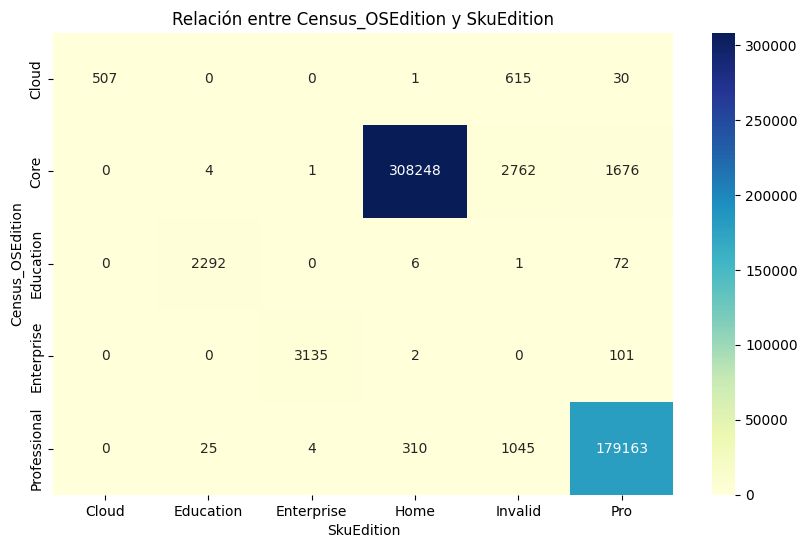

In [ ]:
# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(relation_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Relación entre Census_OSEdition y SkuEdition")
plt.show()

Buscabamos una posible relación entre variables pero es observable que no la hay asi que se mantienen ambas variables

In [ ]:
df_object.head()

MachineIdentifier EngineVersion       AppVersion  \
0  f1cd864e97bae82bdf96523e1a539121   1.1.15100.1  4.18.1807.18075   
1  fd5ba6f5b75325ec0423a6c67cc75942   1.1.15100.1  4.18.1807.18075   
2  4e628391e7cc7c482fb3286f486dbd25   1.1.15100.1   4.9.10586.1106   
3  270a2e9d028144a4df12a9e3da79fba5   1.1.15200.1  4.18.1807.18075   
4  06ca8fa8d32c2abdc5b3577d676b3269   1.1.15200.1  4.18.1807.18075   

   AvSigVersion OsPlatformSubRelease  \
0  1.273.1234.0                  rs4   
1  1.273.1282.0                  rs4   
2   1.273.781.0                  th2   
3  1.275.1639.0                  rs4   
4   1.275.511.0                  rs4   

                                        OsBuildLab SkuEdition  \
0         17134.1.amd64fre.rs4_release.180410-1804        Pro   
1         17134.1.amd64fre.rs4_release.180410-1804        Pro   
2  10586.1176.amd64fre.th2_release_sec.170913-1848       Home   
3         17134.1.amd64fre.rs4_release.180410-1804       Home   
4         17134.1.amd64fre.rs4_release.180410-1804        Pro   

  Census_MDC2FormFactor Census_PrimaryDiskTypeName Census_ChassisTypeName  \
0               Desktop                        HDD               AllinOne   
1              Notebook                        HDD               Notebook   
2           Convertible                        SSD               Notebook   
3              Notebook                        SSD               Notebook   
4              Notebook                        HDD               Portable   

  Census_PowerPlatformRoleName Census_OSVersion  Census_OSBranch  \
0                      Desktop   10.0.17134.165      rs4_release   
1                       Mobile   10.0.17134.165      rs4_release   
2                       Mobile  10.0.10586.1176  th2_release_sec   
3                       Mobile   10.0.17134.286      rs4_release   
4                       Mobile   10.0.17134.228      rs4_release   

  Census_OSEdition Census_OSSkuName Census_OSInstallTypeName  \
0     Professional     PROFESSIONAL               UUPUpgrade   
1     Professional     PROFESSIONAL               UUPUpgrade   
2             Core             CORE                   Update   
3             Core             CORE                 IBSClean   
4     Professional     PROFESSIONAL                   Update   

  Census_OSWUAutoUpdateOptionsName Census_GenuineStateName  \
0                         FullAuto              IS_GENUINE   
1                         FullAuto              IS_GENUINE   
2                           Notify              IS_GENUINE   
3                         FullAuto              IS_GENUINE   
4                         FullAuto              IS_GENUINE   

  Census_ActivationChannel  
0                   OEM:DM  
1                   OEM:DM  
2                   Retail  
3                   Retail  
4                   OEM:DM

#### Census_MDC2FormFactor

In [ ]:
df['Census_MDC2FormFactor'].value_counts()

Census_MDC2FormFactor
Notebook        320948
Desktop         109527
Convertible      22369
Detachable       16802
AllInOne         16372
PCOther           7800
LargeTablet       3645
SmallTablet       1797
SmallServer        496
MediumServer       192
LargeServer         50
ServerOther          2
Name: count, dtype: int64

In [ ]:
df['Census_MDC2FormFactor'] = df['Census_MDC2FormFactor'].replace({'Convertible': 'Hybrid',
                                                         'Detachable': 'Hybrid'})

In [ ]:
df['Census_MDC2FormFactor'] = df['Census_MDC2FormFactor'].replace({'AllInOne': 'Desktop',
                                                         'PCOther': 'Desktop'})

In [ ]:
df['Census_MDC2FormFactor'] = df['Census_MDC2FormFactor'].replace({'LargeTablet': 'Tablet',
                                                         'SmallTablet': 'Tablet'})

In [ ]:
df['Census_MDC2FormFactor'] = df['Census_MDC2FormFactor'].replace({'SmallServer': 'Server',
                                                         'MediumServer': 'Server',
                                                                   'LargeServer': 'Server',
                                                                   'ServerOther': 'Server'})


In [ ]:
df['Census_MDC2FormFactor'].value_counts()

Census_MDC2FormFactor
Notebook    320948
Desktop     133699
Hybrid       39171
Tablet        5442
Server         740
Name: count, dtype: int64

#### Census_PrimaryDiskTypeName

In [ ]:
df['Census_PrimaryDiskTypeName'].value_counts()

Census_PrimaryDiskTypeName
HDD            326138
SSD            138155
UNKNOWN         20083
Unspecified     15624
Name: count, dtype: int64

In [ ]:
df['Census_PrimaryDiskTypeName'] = df['Census_PrimaryDiskTypeName'].replace({'UNKNOWN': 'Unspecified'})

In [ ]:
df['Census_PrimaryDiskTypeName'].value_counts()

Census_PrimaryDiskTypeName
HDD            326138
SSD            138155
Unspecified     35707
Name: count, dtype: int64

In [ ]:
df_object = df.select_dtypes(include=['object','category'])

In [ ]:
df_object.head()

OsPlatformSubRelease  \
MachineIdentifier                                       
f1cd864e97bae82bdf96523e1a539121                  rs4   
fd5ba6f5b75325ec0423a6c67cc75942                  rs4   
4e628391e7cc7c482fb3286f486dbd25                  th2   
270a2e9d028144a4df12a9e3da79fba5                  rs4   
06ca8fa8d32c2abdc5b3577d676b3269                  rs4   

                                                                       OsBuildLab  \
MachineIdentifier                                                                   
f1cd864e97bae82bdf96523e1a539121         17134.1.amd64fre.rs4_release.180410-1804   
fd5ba6f5b75325ec0423a6c67cc75942         17134.1.amd64fre.rs4_release.180410-1804   
4e628391e7cc7c482fb3286f486dbd25  10586.1176.amd64fre.th2_release_sec.170913-1848   
270a2e9d028144a4df12a9e3da79fba5         17134.1.amd64fre.rs4_release.180410-1804   
06ca8fa8d32c2abdc5b3577d676b3269         17134.1.amd64fre.rs4_release.180410-1804   

                                 SkuEdition Census_MDC2FormFactor  \
MachineIdentifier                                                   
f1cd864e97bae82bdf96523e1a539121        Pro               Desktop   
fd5ba6f5b75325ec0423a6c67cc75942        Pro              Notebook   
4e628391e7cc7c482fb3286f486dbd25       Home                Hybrid   
270a2e9d028144a4df12a9e3da79fba5       Home              Notebook   
06ca8fa8d32c2abdc5b3577d676b3269        Pro              Notebook   

                                 Census_PrimaryDiskTypeName  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                        HDD   
fd5ba6f5b75325ec0423a6c67cc75942                        HDD   
4e628391e7cc7c482fb3286f486dbd25                        SSD   
270a2e9d028144a4df12a9e3da79fba5                        SSD   
06ca8fa8d32c2abdc5b3577d676b3269                        HDD   

                                 Census_ChassisTypeName  \
MachineIdentifier                                         
f1cd864e97bae82bdf96523e1a539121               AllinOne   
fd5ba6f5b75325ec0423a6c67cc75942               Notebook   
4e628391e7cc7c482fb3286f486dbd25               Notebook   
270a2e9d028144a4df12a9e3da79fba5               Notebook   
06ca8fa8d32c2abdc5b3577d676b3269               Portable   

                                 Census_PowerPlatformRoleName  \
MachineIdentifier                                               
f1cd864e97bae82bdf96523e1a539121                      Desktop   
fd5ba6f5b75325ec0423a6c67cc75942                       Mobile   
4e628391e7cc7c482fb3286f486dbd25                       Mobile   
270a2e9d028144a4df12a9e3da79fba5                       Mobile   
06ca8fa8d32c2abdc5b3577d676b3269                       Mobile   

                                 Census_OSEdition Census_OSInstallTypeName  \
MachineIdentifier                                                            
f1cd864e97bae82bdf96523e1a539121     Professional               UUPUpgrade   
fd5ba6f5b75325ec0423a6c67cc75942     Professional               UUPUpgrade   
4e628391e7cc7c482fb3286f486dbd25             Core                   Update   
270a2e9d028144a4df12a9e3da79fba5             Core                 IBSClean   
06ca8fa8d32c2abdc5b3577d676b3269     Professional                   Update   

                                 Census_OSWUAutoUpdateOptionsName  \
MachineIdentifier                                                   
f1cd864e97bae82bdf96523e1a539121                         FullAuto   
fd5ba6f5b75325ec0423a6c67cc75942                         FullAuto   
4e628391e7cc7c482fb3286f486dbd25                           Notify   
270a2e9d028144a4df12a9e3da79fba5                         FullAuto   
06ca8fa8d32c2abdc5b3577d676b3269                         FullAuto   

                                 Census_GenuineStateName  \
MachineIdentifier                                          
f1cd864e97bae82bdf96523e1a539121              IS_GENUINE   
fd5ba6f5b75325ec0423a6c67cc759

#### Census_ChassisTypeName

In [ ]:
df['Census_ChassisTypeName'].value_counts()

Census_ChassisTypeName
Notebook               294269
Desktop                104979
Laptop                  38261
Portable                20181
AllinOne                11407
MiniTower                4849
Convertible              4685
Other                    4215
UNKNOWN                  3695
Detachable               2930
LowProfileDesktop        2878
HandHeld                 2652
SpaceSaving              1689
Tablet                    730
Tower                     692
Unknown                   575
MainServerChassis         512
MiniPC                    261
LunchBox                  224
RackMountChassis          189
SubNotebook                47
BusExpansionChassis        38
30                         11
StickPC                     7
0                           5
MultisystemChassis          3
35                          3
PizzaBox                    3
Blade                       3
31                          2
SubChassis                  2
32                          1
ExpansionChassis            1
25                          1
Name: count, dtype: int64

In [ ]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'Laptop': 'Notebook',
                                                                     'Portable': 'Notebook',
                                                                     'SubNotebook': 'Notebook'})

In [ ]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'AllinOne': 'Desktop',
                                                                     'LowProfileDesktop': 'Desktop',
                                                                     'MiniPC': 'Desktop',
                                                                     'StickPC': 'Desktop'})

In [ ]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'MiniTower': 'Tower'})

In [ ]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'Convertible': 'Hybrid',
                                                                     'Detachable': 'Hybrid'})

In [ ]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'HandHeld': 'Tablet'})

In [ ]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'UNKNOWN': 'Unknown'})

In [ ]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'MainServerChassis': 'LargeChassis',
                                                                     'RackMountChassis': 'LargeChassis',
                                                                     'BusExpansionChassis': 'LargeChassis',
                                                                     'MultisystemChassis': 'LargeChassis',
                                                                     'ExpansionChassis': 'LargeChassis'})

In [ ]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'SpaceSaving': 'CompactChassis',
                                                                     'LunchBox': 'CompactChassis',
                                                                     'PizzaBox': 'CompactChassis',
                                                                     'Blade': 'CompactChassis',
                                                                     'SubChassis': 'CompactChassis'})

In [ ]:
df['Census_ChassisTypeName'] = df['Census_ChassisTypeName'].replace({'Other': 'Others',
                                                                     '30': 'Others',
                                                                     '0': 'Others',
                                                                     '35': 'Others',
                                                                     '31': 'Others',
                                                                     '32': 'Others',
                                                                     '25': 'Others'})

In [ ]:
df['Census_ChassisTypeName'].value_counts()

Census_ChassisTypeName
Notebook          352758
Desktop           119532
Hybrid              7615
Tower               5541
Unknown             4270
Others              4238
Tablet              3382
CompactChassis      1921
LargeChassis         743
Name: count, dtype: int64

In [ ]:
relation_table = pd.crosstab(df['Census_MDC2FormFactor'], df['Census_ChassisTypeName'])

# Mostrar la tabla
print(relation_table)

Census_ChassisTypeName  CompactChassis  Desktop  Hybrid  LargeChassis  \
Census_MDC2FormFactor                                                   
Desktop                           1918   115159      50           171   
Hybrid                               0     1299    7446           326   
Notebook                             0     1626      94             2   
Server                               3      205       0           227   
Tablet                               0     1243      25            17   

Census_ChassisTypeName  Notebook  Others  Tablet  Tower  Unknown  
Census_MDC2FormFactor                                             
Desktop                     6941    1884     221   5458     1897  
Hybrid                     27810      18    1946      0      326  
Notebook                  314844    2083     284      1     2014  
Server                         2     221       0     82        0  
Tablet                      3161      32     931      0       33  


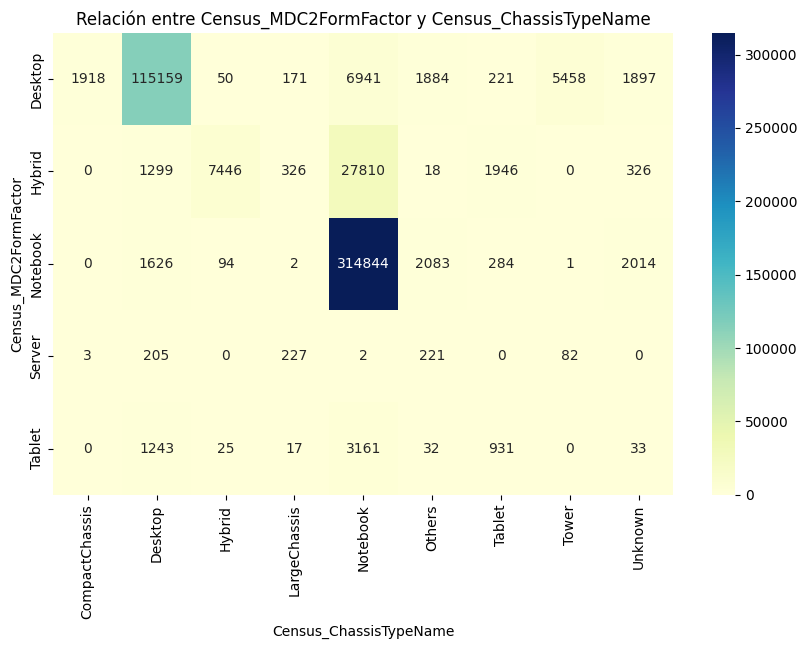

In [ ]:
# Graficar el heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(relation_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Relación entre Census_MDC2FormFactor y Census_ChassisTypeName")
plt.show()

#### Census_PowerPlatformRoleName

In [ ]:
df['Census_PowerPlatformRoleName'].value_counts()

Census_PowerPlatformRoleName
Mobile               346380
Desktop              116054
Slate                 27475
Workstation            6235
SOHOServer             2062
UNKNOWN                1172
EnterpriseServer        406
AppliancePC             212
PerformanceServer         4
Name: count, dtype: int64

In [ ]:
df['Census_PowerPlatformRoleName'] = df['Census_PowerPlatformRoleName'].replace({'SOHOServer': 'Server',
                                                                     'EnterpriseServer': 'Server',
                                                                     'PerformanceServer': 'Server'})

In [ ]:
df['Census_PowerPlatformRoleName'] = df['Census_PowerPlatformRoleName'].replace({'AppliancePC': 'Workstation'})

In [ ]:
df['Census_PowerPlatformRoleName'].value_counts()

Census_PowerPlatformRoleName
Mobile         346380
Desktop        116054
Slate           27475
Workstation      6447
Server           2472
UNKNOWN          1172
Name: count, dtype: int64

#### Census_OSInstallTypeName

In [ ]:
df['Census_OSInstallTypeName'].value_counts()

Census_OSInstallTypeName
UUPUpgrade        146780
IBSClean           92403
Update             88892
Upgrade            70013
Other              46960
Reset              36510
Refresh            11540
Clean               3885
CleanPCRefresh      3017
Name: count, dtype: int64

In [ ]:
df['Census_OSWUAutoUpdateOptionsName'].value_counts()

Census_OSWUAutoUpdateOptionsName
FullAuto                                 222482
UNKNOWN                                  140961
Notify                                   113507
AutoInstallAndRebootAtMaintenanceTime     20731
Off                                        1506
DownloadNotify                              813
Name: count, dtype: int64

In [ ]:
df['Census_GenuineStateName'].value_counts()

Census_GenuineStateName
IS_GENUINE         441402
INVALID_LICENSE     44990
OFFLINE             12834
UNKNOWN               774
Name: count, dtype: int64

In [ ]:
df['Census_ActivationChannel'].value_counts()

Census_ActivationChannel
Retail            264932
OEM:DM            191350
Volume:GVLK        25109
OEM:NONSLP         17943
Volume:MAK           468
Retail:TB:Eval       198
Name: count, dtype: int64

#### OsBuildLab

In [ ]:
df['OsBuildLab'].value_counts()

OsBuildLab
17134.1.amd64fre.rs4_release.180410-1804                    206437
16299.431.amd64fre.rs3_release_svc_escrow.180502-1908        69884
16299.15.amd64fre.rs3_release.170928-1534                    53826
15063.0.amd64fre.rs2_release.170317-1834                     39908
17134.1.x86fre.rs4_release.180410-1804                       14334
16299.15.x86fre.rs3_release.170928-1534                      13105
14393.2189.amd64fre.rs1_release.180329-1711                  10724
10240.17443.amd64fre.th1.170602-2340                          9538
10586.1176.amd64fre.th2_release_sec.170913-1848               8385
15063.0.x86fre.rs2_release.170317-1834                        3444
14393.0.amd64fre.rs1_release.160715-1616                      3239
9600.19067.amd64fre.winblue_ltsb_escrow.180619-2033           3160
9600.19101.amd64fre.winblue_ltsb_escrow.180718-1800           3139
16299.637.amd64fre.rs3_release_svc.180808-1748                2439
14393.2189.x86fre.rs1_release.180329-1711                     2231
10586.1176.x86fre.th2_release_sec.170913-1848                 2005
14393.693.amd64fre.rs1_release.161220-1747                    2001
10240.17443.x86fre.th1.170602-2340                            1847
14393.2214.amd64fre.rs1_release_1.180402-1758                 1702
10586.0.amd64fre.th2_release.151029-1700                      1491
10240.16384.amd64fre.th1.150709-1700                          1415
14393.2007.amd64fre.rs1_release.171231-1800                   1278
14393.1593.amd64fre.rs1_release.170731-1934                   1224
14393.447.amd64fre.rs1_release_inmarket.161102-0100           1100
14393.1944.amd64fre.rs1_release.171129-2100                   1099
14393.1770.amd64fre.rs1_release.170917-1700                   1085
7601.24214.amd64fre.win7sp1_ldr_escrow.180801-1700            1082
14393.1198.amd64fre.rs1_release_sec.170427-1353               1040
7601.24168.amd64fre.win7sp1_ldr.180608-0600                   1030
10586.672.amd64fre.th2_release_sec.161024-1825                 975
10586.162.amd64fre.th2_release_sec.160223-1728                 952
14393.1358.amd64fre.rs1_release.170602-2252                    944
9600.19125.amd64fre.winblue_ltsb.180812-0703                   873
10586.1106.amd64fre.th2_release.170904-1742                    869
14393.2068.amd64fre.rs1_release.180209-1727                    840
14393.1066.amd64fre.rs1_release_sec.170327-1835                827
14393.953.amd64fre.rs1_release_inmarket.170303-1614            821
14393.1794.amd64fre.rs1_release.171008-1615                    815
14393.1480.amd64fre.rs1_release.170706-2004                    789
14393.1715.amd64fre.rs1_release_inmarket.170906-1810           767
9600.19035.amd64fre.winblue_ltsb_escrow.180522-1700            745
14393.351.amd64fre.rs1_release_inmarket.161014-1755            721
10586.494.amd64fre.th2_release_sec.160630-1736                 704
14393.2125.amd64fre.rs1_release.180301-2139                    594
14393.187.amd64fre.rs1_release_inmarket.160906-1818            564
10586.420.amd64fre.th2_release_sec.160527-1834                 560
10586.1045.amd64fre.th2_release.170728-1941                    523
9600.18821.amd64fre.winblue_ltsb.170914-0600                   521
10586.103.amd64fre.th2_release.160126-1819                     519
14393.576.amd64fre.rs1_release_inmarket.161208-2252            512
14393.2214.x86fre.rs1_release_1.180402-1758                    509
10586.545.amd64fre.th2_release.160802-1857                     462
9600.19000.amd64fre.winblue_ltsb.180410-0600                   449
7601.24214.x86fre.win7sp1_ldr_escrow.180801-1700               417
10586.306.amd64fre.th2_release_sec.160422-1850                 411
10586.839.amd64fre.th2_release.170303-1605                     397
7601.24231.amd64fre.win7sp1_ldr.180810-0600                    395
7601.24168.x86fre.win7sp1_ldr.180608-0600                      376
16299.402.amd64fre.rs3_release_svc_escrow_im.180415-0955       361
10586.212.amd64fre.th2_release_sec.1

Acontinuación lo que intentamos es obtener la versión principal de la columna OsBuildLab y la versión secundaria

In [ ]:
def extract_main_version(os_build_lab):
    match = re.match(r'^(\d+)\.', str(os_build_lab))  # Busca el número antes del primer punto
    return match.group(1) if match else None

# Aplica la función a la columna 'OsBuildLab' y crea una nueva columna con la versión principal
df['MainVersion'] = df['OsBuildLab'].apply(extract_main_version)
df['MainVersion'] = pd.to_numeric(df['MainVersion'], errors='coerce')

In [ ]:
def extract_secondary_version(os_build_lab):
    match = re.match(r'^\d+\.(\d+)\.', str(os_build_lab))  # Busca el número entre el primer y segundo punto
    return match.group(1) if match else None

In [ ]:
df['SecondaryVersion'] = df['OsBuildLab'].apply(extract_secondary_version)
df['SecondaryVersion'] = pd.to_numeric(df['SecondaryVersion'], errors='coerce')

In [ ]:
df.drop(columns=['OsBuildLab'], axis = 1, inplace=True)

In [ ]:
df.head()

AVProductStatesIdentifier  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                    53447.0   
fd5ba6f5b75325ec0423a6c67cc75942                    53447.0   
4e628391e7cc7c482fb3286f486dbd25                    46781.0   
270a2e9d028144a4df12a9e3da79fba5                    53447.0   
06ca8fa8d32c2abdc5b3577d676b3269                    47238.0   

                                  AVProductsInstalled  CountryIdentifier  \
MachineIdentifier                                                          
f1cd864e97bae82bdf96523e1a539121                  1.0                  8   
fd5ba6f5b75325ec0423a6c67cc75942                  1.0                129   
4e628391e7cc7c482fb3286f486dbd25                  2.0                149   
270a2e9d028144a4df12a9e3da79fba5                  1.0                164   
06ca8fa8d32c2abdc5b3577d676b3269                  2.0                207   

                                  CityIdentifier  GeoNameIdentifier  \
MachineIdentifier                                                     
f1cd864e97bae82bdf96523e1a539121         85219.0              205.0   
fd5ba6f5b75325ec0423a6c67cc75942         54198.0              126.0   
4e628391e7cc7c482fb3286f486dbd25        122689.0              181.0   
270a2e9d028144a4df12a9e3da79fba5        114587.0              205.0   
06ca8fa8d32c2abdc5b3577d676b3269         72421.0              277.0   

                                  LocaleEnglishNameIdentifier  OsBuild  \
MachineIdentifier                                                        
f1cd864e97bae82bdf96523e1a539121                          172    17134   
fd5ba6f5b75325ec0423a6c67cc75942                          124    17134   
4e628391e7cc7c482fb3286f486dbd25                           56    10586   
270a2e9d028144a4df12a9e3da79fba5                          172    17134   
06ca8fa8d32c2abdc5b3577d676b3269                           75    17134   

                                  OsSuite OsPlatformSubRelease SkuEdition  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121      256                  rs4        Pro   
fd5ba6f5b75325ec0423a6c67cc75942      256                  rs4        Pro   
4e628391e7cc7c482fb3286f486dbd25      768                  th2       Home   
270a2e9d028144a4df12a9e3da79fba5      768                  rs4       Home   
06ca8fa8d32c2abdc5b3577d676b3269      256                  rs4        Pro   

                                  IeVerIdentifier Census_MDC2FormFactor  \
MachineIdentifier                                                         
f1cd864e97bae82bdf96523e1a539121            137.0               Desktop   
fd5ba6f5b75325ec0423a6c67cc75942            137.0              Notebook   
4e628391e7cc7c482fb3286f486dbd25             74.0                Hybrid   
270a2e9d028144a4df12a9e3da79fba5            137.0              Notebook   
06ca8fa8d32c2abdc5b3577d676b3269            137.0              Notebook   

                                  Census_OEMNameIdentifier  \
MachineIdentifier                                            
f1cd864e97bae82bdf96523e1a539121                    1443.0   
fd5ba6f5b75325ec0423a6c67cc75942                    2102.0   
4e628391e7cc7c482fb3286f486dbd25                    2206.0   
270a2e9d028144a4df12a9e3da79fba5                     525.0   
06ca8fa8d32c2abdc5b3577d676b3269                    1443.0   

                                  Census_OEMModelIdentifier  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                   275891.0   
fd5ba6f5b75325ec0423a6c67cc75942                   248850.0   
4e628391e7cc7c482fb3286f486dbd25                   238234.0   
270a2e9d028144a4df12a9e3da79fba5                   265410.0   
06ca8fa8d32c2abdc5b3577d676b3269                   256478.0   

                                  Census_ProcessorCoreCount  \
MachineIdentifier                   

In [ ]:
df.describe(exclude=['object']).T

count          mean  \
AVProductStatesIdentifier                          500000.0  4.787260e+04   
AVProductsInstalled                                500000.0  1.325496e+00   
CountryIdentifier                                  500000.0  1.080375e+02   
CityIdentifier                                     500000.0  8.131182e+04   
GeoNameIdentifier                                  500000.0  1.697308e+02   
LocaleEnglishNameIdentifier                        500000.0  1.226110e+02   
OsBuild                                            500000.0  1.572693e+04   
OsSuite                                            500000.0  5.747186e+02   
IeVerIdentifier                                    500000.0  1.267161e+02   
Census_OEMNameIdentifier                           500000.0  2.217391e+03   
Census_OEMModelIdentifier                          500000.0  2.392248e+05   
Census_ProcessorCoreCount                          500000.0  3.994102e+00   
Census_ProcessorManufacturerIdentifier             500000.0  4.531280e+00   
Census_ProcessorModelIdentifier                    500000.0  2.371593e+03   
Census_PrimaryDiskTotalCapacity                    500000.0  5.138225e+05   
Census_SystemVolumeTotalCapacity                   500000.0  3.772892e+05   
Census_TotalPhysicalRAM                            500000.0  6.110705e+03   
Census_InternalPrimaryDiagonalDisplaySizeInInches  500000.0  1.668352e+01   
Census_InternalPrimaryDisplayResolutionHorizontal  500000.0  1.547338e+03   
Census_InternalPrimaryDisplayResolutionVertical    500000.0  8.975491e+02   
Census_InternalBatteryNumberOfCharges              500000.0  1.091747e+09   
Census_OSBuildNumber                               500000.0  1.584137e+04   
Census_OSBuildRevision                             500000.0  9.672248e+02   
Census_OSInstallLanguageIdentifier                 500000.0  1.456815e+01   
Census_OSUILocaleIdentifier                        500000.0  6.044631e+01   
Census_FirmwareManufacturerIdentifier              500000.0  4.046904e+02   
Census_FirmwareVersionIdentifier                   500000.0  3.303170e+04   
Census_IsSecureBootEnabled                         500000.0  4.854380e-01   
Census_IsTouchEnabled                              500000.0  1.254340e-01   
Wdft_IsGamer                                       500000.0  2.744300e-01   
Wdft_RegionIdentifier                              500000.0  7.960154e+00   
HasDetections                                      500000.0  4.999060e-01   
AppVersion_numeric_padded                          500000.0  4.221184e+12   
EngineVersion_numeric_padded                       500000.0  1.115076e+07   
AvSigVersion_numeric_padded                        500000.0  1.272740e+08   
Census_OSVersion_numeric_padded                    500000.0  1.001595e+12   
MainVersion                                        500000.0  1.572693e+04   
SecondaryVersion                                   500000.0  1.415364e+03   

                                                            std           min  \
AVProductStatesIdentifier                          1.400020e+04  3.000000e+00   
AVProductsInstalled                                5.223800e-01  1.000000e+00   
CountryIdentifier                                  6.306854e+01  1.000000e+00   
CityIdentifier                                     4.808378e+04  7.000000e+00   
GeoNameIdentifier                                  8.932377e+01  1.000000e+00   
LocaleEnglishNameIdentifier                        6.930317e+01  1.000000e+00   
OsBuild                                            2.188646e+03  7.600000e+03   
OsSuite                                            2.482033e+02  1.600000e+01   
IeVerIdentifier                                    4.250307e+01  8.000000e+00   
Census_OEMNameIdentifier                           1.308666e+03  5.400000e+01   
Census_OEMModelIdentifier                          7.163799e+04  1.000000e+00   
Census_ProcessorCoreCount                          2.066414e+00  1.000000e+00 

In [ ]:
df.describe(include=['object']).T

count unique         top    freq
OsPlatformSubRelease              500000      9         rs4  220779
SkuEdition                        500000      6        Home  308567
Census_MDC2FormFactor             500000      5    Notebook  320948
Census_PrimaryDiskTypeName        500000      3         HDD  326138
Census_ChassisTypeName            500000      9    Notebook  352758
Census_PowerPlatformRoleName      500000      6      Mobile  346380
Census_OSEdition                  500000      5        Core  312691
Census_OSInstallTypeName          500000      9  UUPUpgrade  146780
Census_OSWUAutoUpdateOptionsName  500000      6    FullAuto  222482
Census_GenuineStateName           500000      4  IS_GENUINE  441402
Census_ActivationChannel          500000      6      Retail  264932

In [ ]:
df.shape

(500000, 49)

Hacemos una copia previo al modeling

In [ ]:
df_processed = df.copy()

In [ ]:
df_processed.head()

AVProductStatesIdentifier  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                    53447.0   
fd5ba6f5b75325ec0423a6c67cc75942                    53447.0   
4e628391e7cc7c482fb3286f486dbd25                    46781.0   
270a2e9d028144a4df12a9e3da79fba5                    53447.0   
06ca8fa8d32c2abdc5b3577d676b3269                    47238.0   

                                  AVProductsInstalled  CountryIdentifier  \
MachineIdentifier                                                          
f1cd864e97bae82bdf96523e1a539121                  1.0                  8   
fd5ba6f5b75325ec0423a6c67cc75942                  1.0                129   
4e628391e7cc7c482fb3286f486dbd25                  2.0                149   
270a2e9d028144a4df12a9e3da79fba5                  1.0                164   
06ca8fa8d32c2abdc5b3577d676b3269                  2.0                207   

                                  CityIdentifier  GeoNameIdentifier  \
MachineIdentifier                                                     
f1cd864e97bae82bdf96523e1a539121         85219.0              205.0   
fd5ba6f5b75325ec0423a6c67cc75942         54198.0              126.0   
4e628391e7cc7c482fb3286f486dbd25        122689.0              181.0   
270a2e9d028144a4df12a9e3da79fba5        114587.0              205.0   
06ca8fa8d32c2abdc5b3577d676b3269         72421.0              277.0   

                                  LocaleEnglishNameIdentifier  OsBuild  \
MachineIdentifier                                                        
f1cd864e97bae82bdf96523e1a539121                          172    17134   
fd5ba6f5b75325ec0423a6c67cc75942                          124    17134   
4e628391e7cc7c482fb3286f486dbd25                           56    10586   
270a2e9d028144a4df12a9e3da79fba5                          172    17134   
06ca8fa8d32c2abdc5b3577d676b3269                           75    17134   

                                  OsSuite OsPlatformSubRelease SkuEdition  \
MachineIdentifier                                                           
f1cd864e97bae82bdf96523e1a539121      256                  rs4        Pro   
fd5ba6f5b75325ec0423a6c67cc75942      256                  rs4        Pro   
4e628391e7cc7c482fb3286f486dbd25      768                  th2       Home   
270a2e9d028144a4df12a9e3da79fba5      768                  rs4       Home   
06ca8fa8d32c2abdc5b3577d676b3269      256                  rs4        Pro   

                                  IeVerIdentifier Census_MDC2FormFactor  \
MachineIdentifier                                                         
f1cd864e97bae82bdf96523e1a539121            137.0               Desktop   
fd5ba6f5b75325ec0423a6c67cc75942            137.0              Notebook   
4e628391e7cc7c482fb3286f486dbd25             74.0                Hybrid   
270a2e9d028144a4df12a9e3da79fba5            137.0              Notebook   
06ca8fa8d32c2abdc5b3577d676b3269            137.0              Notebook   

                                  Census_OEMNameIdentifier  \
MachineIdentifier                                            
f1cd864e97bae82bdf96523e1a539121                    1443.0   
fd5ba6f5b75325ec0423a6c67cc75942                    2102.0   
4e628391e7cc7c482fb3286f486dbd25                    2206.0   
270a2e9d028144a4df12a9e3da79fba5                     525.0   
06ca8fa8d32c2abdc5b3577d676b3269                    1443.0   

                                  Census_OEMModelIdentifier  \
MachineIdentifier                                             
f1cd864e97bae82bdf96523e1a539121                   275891.0   
fd5ba6f5b75325ec0423a6c67cc75942                   248850.0   
4e628391e7cc7c482fb3286f486dbd25                   238234.0   
270a2e9d028144a4df12a9e3da79fba5                   265410.0   
06ca8fa8d32c2abdc5b3577d676b3269                   256478.0   

                                  Census_ProcessorCoreCount  \
MachineIdentifier                   

In [ ]:
categoricas = list(df_processed.select_dtypes(include=['object','category']).columns)

In [ ]:
categoricas

['OsPlatformSubRelease',
 'SkuEdition',
 'Census_MDC2FormFactor',
 'Census_PrimaryDiskTypeName',
 'Census_ChassisTypeName',
 'Census_PowerPlatformRoleName',
 'Census_OSEdition',
 'Census_OSInstallTypeName',
 'Census_OSWUAutoUpdateOptionsName',
 'Census_GenuineStateName',
 'Census_ActivationChannel']

##OHE

Hacemos el one hot encoding de las variables categoricas

In [ ]:
df_encoded = pd.get_dummies(df_processed, columns=categoricas)

In [ ]:
df_encoded.shape

(500000, 106)

##Modeling

In [ ]:
X = df_encoded.drop('HasDetections', axis=1)
y = df_encoded['HasDetections']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Crear el modelo
model = DecisionTreeClassifier(random_state=42, max_depth=8)

# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

In [ ]:
# Predicciones
y_pred = model.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.60387

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.52      0.57     49902
           1       0.59      0.68      0.63     50098

    accuracy                           0.60    100000
   macro avg       0.61      0.60      0.60    100000
weighted avg       0.61      0.60      0.60    100000


Confusion Matrix:
 [[26131 23771]
 [15842 34256]]


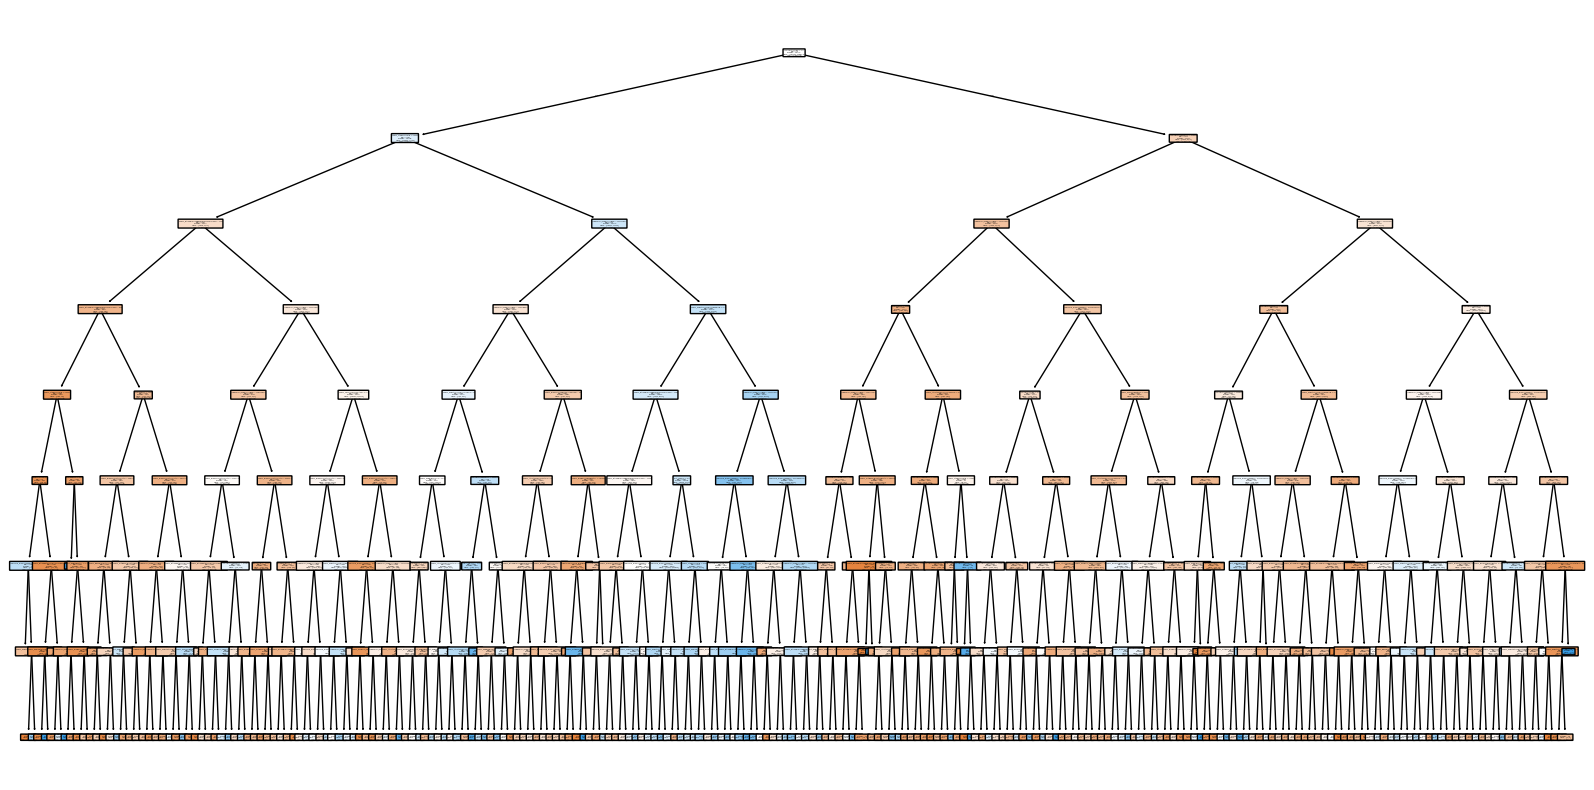

In [ ]:
# Visualizar el árbol de decisión
plt.figure(figsize=(20, 10))  # Ajusta el tamaño de la figura
plot_tree(model,
          feature_names=X.columns,  # Nombres de las características
          class_names=['No Detection', 'Detection'],  # Nombres de las clases
          filled=True,  # Colorear los nodos
          rounded=True)  # Nodos redondeados
plt.show()


In [ ]:
y_test_pred = pd.DataFrame(model.predict(X_test), index = y_test.index, columns = ['VirusPrediction'])

In [ ]:
y_test_pred.head()

VirusPrediction
MachineIdentifier                                
f790fe9aa6ddef7a6ec46ee482f0d1fb                1
ea57ce28051c4fc6a7bd1e0af12dd61a                1
5ab18e080c3910361a760d3da550e0ca                0
b7076d643f0fca3d710d589f1b84d9fe                0
b7ca3352f5ed2b17ad5d56e96a4a9e8c                1

In [ ]:
y_test = pd.DataFrame(y_test)

In [ ]:
result_df = y_test.join(y_test_pred, how = 'inner')

In [ ]:
result_df.head()

HasDetections  VirusPrediction
MachineIdentifier                                               
f790fe9aa6ddef7a6ec46ee482f0d1fb              0                1
ea57ce28051c4fc6a7bd1e0af12dd61a              1                1
5ab18e080c3910361a760d3da550e0ca              1                0
b7076d643f0fca3d710d589f1b84d9fe              0                0
b7ca3352f5ed2b17ad5d56e96a4a9e8c              1                1

In [ ]:
# Predicciones en los datos de entrenamiento
y_train_pred = model.predict(X_train)

In [ ]:
# Métricas en entrenamiento
print("Entrenamiento - Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nEntrenamiento - Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nEntrenamiento - Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))


Entrenamiento - Accuracy: 0.609455

Entrenamiento - Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.53      0.58    200145
           1       0.59      0.69      0.64    199855

    accuracy                           0.61    400000
   macro avg       0.61      0.61      0.61    400000
weighted avg       0.61      0.61      0.61    400000


Entrenamiento - Confusion Matrix:
 [[106426  93719]
 [ 62499 137356]]


Podemos ver que el accuracy del modelo tanto en test como en training ronda el 0.6

Nuestro modelo esta 'underfitting' y lo más probable es que sea porque las características no ofrecen suficiente valor al modelo

In [ ]:
for i in range(1,15):
  dt = DecisionTreeClassifier(max_depth = i, random_state = 42)
  dt.fit(X_train, y_train)
  acc_train = dt.score(X_train, y_train)
  acc_test = dt.score(X_test, y_test)
  print('Profundidad del arbol: {}. Train: {}, Test: {}, Diferencia: {}'.format(i,np.round(acc_train,3), np.round(acc_test,3), np.round(acc_train,3) - np.round(acc_test,3) ))

Profundidad del arbol: 1. Train: 0.566, Test: 0.567, Diferencia: -0.0010000000000000009
Profundidad del arbol: 2. Train: 0.584, Test: 0.583, Diferencia: 0.0010000000000000009
Profundidad del arbol: 3. Train: 0.592, Test: 0.589, Diferencia: 0.0030000000000000027
Profundidad del arbol: 4. Train: 0.593, Test: 0.591, Diferencia: 0.0020000000000000018
Profundidad del arbol: 5. Train: 0.597, Test: 0.594, Diferencia: 0.0030000000000000027
Profundidad del arbol: 6. Train: 0.602, Test: 0.598, Diferencia: 0.0040000000000000036
Profundidad del arbol: 7. Train: 0.605, Test: 0.602, Diferencia: 0.0030000000000000027
Profundidad del arbol: 8. Train: 0.609, Test: 0.604, Diferencia: 0.0050000000000000044
Profundidad del arbol: 9. Train: 0.613, Test: 0.605, Diferencia: 0.008000000000000007
Profundidad del arbol: 10. Train: 0.619, Test: 0.606, Diferencia: 0.013000000000000012
Profundidad del arbol: 11. Train: 0.625, Test: 0.604, Diferencia: 0.02100000000000002
Profundidad del arbol: 12. Train: 0.634, Tes

Podemos observar que a mayor profundidad mayor es el accuracy pero en test perdemos accuracy. En el bucle podemos observar que la mejor profundidad es de 8 donde la diferencia entre el train y el test, no es la más baja pero si donde tenemos mayor accuracy entre train y test y la diferencia entre estas no es de las más altas

Visualizamos nuestra curva ROC

In [ ]:
# Obtener las probabilidades de predicción para la clase positiva
y_test_proba = model.predict_proba(X_test)[:, 1]

# Calcular los valores FPR (False Positive Rate), TPR (True Positive Rate) y los umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=1, label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Random Forest

Acontinuación exploramos otro modelo (en este caso el random forest) para intentar obtener mejores resultados

In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en los datos de prueba
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.62


## Conlusiones

- A pesar de haber probado con un modelo más complejo, la precisión (accuracy) no ha mejorado significativamente, lo que sugiere que las variables utilizadas no aportan suficiente valor predictivo al modelo.
- Esto indica que el modelo podría estar limitado por la calidad y relevancia de los datos más que por la arquitectura o complejidad del algoritmo empleado.
- Un mejor preprocesamiento de las variables, incluyendo técnicas de selección, transformación y generación de nuevas características, podría haber contribuido a mejorar el rendimiento del modelo.
- Sin embargo, dado que este es un primer acercamiento, el objetivo principal ha sido aplicar los conocimientos adquiridos en clase y comprender el proceso de entrenamiento y evaluación de un modelo supervisado.
- En iteraciones futuras, se podrían incorporar mejoras como:
  - Ingeniería de características: Creación de nuevas variables más representativas y eliminación de aquellas que aportan ruido.
  - Normalización o estandarización de datos: Para mejorar el desempeño en modelos sensibles a la escala de las variables.
  - Optimización de hiperparámetros: Uso de técnicas como Grid Search o Random Search para encontrar la mejor configuración del modelo.
  - Balanceo de datos: Si el dataset está desbalanceado, aplicar técnicas de sobremuestreo o submuestreo podría mejorar la precisión del modelo
  - Uso de modelos más avanzados: Explorar técnicas más sofisticadas como ensamblado de modelos (bagging, boosting) o redes neuronales, según el tipo de problema.
- En conclusión, este modelo representa una versión inicial con un enfoque en la comprensión del proceso de Machine Learning, y se espera que con los conocimientos adquiridos posteriormente se pueda optimizar su rendimiento en futuras iteraciones.